***
 # <span style="color:blue;"> Module 2 Assignment Project </span>
***


### <u>Data Set</u>

The team has chosen to use the **Brazilian E-Commerce Public Dataset by Olist**, available on [Kaggle](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce).

[Olist](https://www.olist.com/) is a Brazillian e-commerce platform that functions as a marketplace, connecting small and medium-sized businesses with customers in Brazil.

The dataset of interest contains information on approximately **100,000 orders from 2016 to 2018 made at multiple marketplaces in Brazil**. It includes details on order status, price, payment, freight performance to customer location, product attributes, and customer reviews.

![alt text here](https://miro.medium.com/v2/resize:fit:1400/1*1k72mg1_CZvLptX77zzKTg.png)

In total, there are 9 CSV files in a zipped dataset with a combined file size of about 126 MB. They are:

|  #  | Category   | Dataset                                 | Key Information                                                                                                                                                  | Size   |
| :-: | :--------- | :-------------------------------------- | :--------------------------------------------------------------------------------------------------------------------------------------------------------------- | :----- |
|  1  | Order      | `olist_orders_dataset.csv`              | **Order ID**, Customer ID, Order Status, Order Purchase Timestamp, Order Approval, Order Delivered Carrier Date, Order Delivered Date, Order Delivery Estimated Date | 18 MB  |
|  2  | Order      | `olist_order_items_dataset.csv`         | Order ID, Product ID, Seller ID, Shipping Limit Date, Price, Freight Value                                                                                       | 15 MB  |
|  3  | Order      | `olist_order_reviews_dataset.csv`       | Review ID, Order ID, Review Score, Review Comment Title (Portuguese), Review Comment Message (Portuguese), Review Creation Date, Review Answer Timestamp         | 14 MB  |
|  4  | Order      | `olist_order_payments_dataset.csv`      | Order ID, Payment Type, Payment Installment, Payment Value                                                                                                                 | 6 MB   |
|  5  | Product    | `olist_products_dataset.csv`            | **Product ID**, Product Category Name                                                                                                                                | 2 MB   |
|  6  | Product    | `product_category_name_translation.csv` | **Product Category Name**, Product Category Name (English)                                                                                                                    | 13 KB  |
|  7  | Customer   | `olist_customers_dataset.csv`           | **Customer ID** and location (zip code, city, state)                                                                                                                 | 9 MB   |
|  8  | Seller     | `olist_sellers_dataset.csv`             | **Seller ID** and location (zip code, city, state)                                                                                                                   | 175 KB |
|  9  | Geospatial | `olist_geolocation_dataset.csv`         | Zipcode, Longitude, Latitude. Can be used to match with customer and seller location                                                           | 61 MB  |


### <u> Project Aims </u>

We aim to provide valuable insights/actionables for the following business questions:

1. What are some of the possible reasons that could **explain a difference in consumer behaviour** and their effects on transaction orders and revenue;
2. What **factors affect customer satisfaction** and what can be done to improve customer satisfaction.

By understanding the underlying consumer behaviour and the factors that affect customer satisfaction, it can help to sharpen marketing/promotion effects as well as improve the overall customer experience. This in turn will help to boost revenue and increase Customer Lifetime Value (CLV). 


And to do so, our supporting analysis has focused on these key areas:

> 1. **Analyze volume and value of transaction across different time periods**. This could help to identify when and why transactions could peak at certain timings. Promotion/marketing campagins can then be tailored accordingly.
> 2. **Analyze customers reviews to extract sentiment and common themes**. This could help to improve product quality and customer service and boost sales.
> 3. **Analyze order fulfillment times, shipping delays, and delivery performance**. This could help to improve the customer experience and boost sales.
> 4. **Analyse data on customers and sellers** on location and impact on customer satisfaction.

To facilitate this, we have built an end-to-end pipeline and analysis workflow as follows: Details can be found in the sections below.

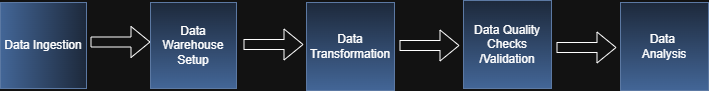

### <u> Key Findings </u>

1. There is **scope for differentiation in terms of marketing campaigns/promotions during peak order months**. E.g. for months driven by online sale events vs gift-giving holidays. The former has more customers making mulitples orders and the latter has higher average value per order. Further granularity could possibly be by the **best-selling product categories in the different peak order months**.

2. The **lower the review score is, the higher the proportion of non-null text comments provided by customers**. It is possible that customers may be more inclined to voice out what caused their dissatisfaction rathen than explain what made them satisfied. In future, perhaps the **review system could be revamped to encourage more detailed reviews in different categories** (e.g. delivery, product quality etc) so that we can gather more insights on what aspects of the transaction are the consumers are satisifed or disatisified with.

3. **Delivery times and later-than-expecected deliveries appear to have an impact on customer review scores**. Customers giving a 1 had to wait twice as long on average for their orders to be delivered, as compared to customers who gave a score of 5. **As a possible KPI we can set a standard to ensure most deliveries are delivered with 10-14 days from purchase**. (13 days was the 75% percentile for orders that scored 5 on reviews) Later-than-expected deliveries are also disproportionally higher for reviews that scored 1. Hence, the operations team could look into **providing more realistic estimated delivery times** while working on delivery efficiency and meeting the proposed KPI.
   
4. **The customer-to-seller ratio in a state could have an impact on the average review score from customers within that state**. There is a negative correlation of around **-0.7** between the two. Hence having sellers in proximity of customers may be beneficial. We could consider onboarding more sellers in the state of Rio De Janeiro, which has a relatively lower average review score, and higher customer-to-seller ratio as compared to the other states that are in the top 5 for customer payments.

***
 # <span style="color:blue;"> 1. Data Ingestion </span>
***

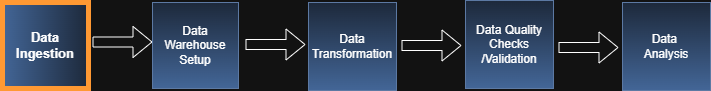

The first phase of the project involved the **ingestion of the Olist Kaggle dataset into Bigquery** , which was done using the following steps:
>  a) Create and Set Directory to Work In 
> <br> b) Set Up and Download Kaggle Token 
> <br> c) Configure Kaggle and Google Cloud
> <br> d) Set Up Key for Service Account in Google Cloud Storage 
> <br> e) Grant Storage Bucket Creation and Read Permission 
> <br> f) Create the Google Storage Bucket 
> <br> g) Download the Kaggle Dataset and Unzip Zipped Folder
> <br> h) Do some Data Cleaning and Validation
> <br> i) Upload the CSV Files to the Google Storage Bucket
> <br> j) Load the Files from Google Storage to BigQuery
> <br> k) Check that Number of Rows Tally Between Bigquery Tables and Local CSV Files

<u> **a) Create and Set Directory to Work In** </u>


In [ ]:
import os
import pandas as pd
from IPython.display import display

# Set display options
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
# suppresses the SettingWithCopyWarning for all subsequent operations within the current Python session
pd.options.mode.chained_assignment = None

my_csv_files_directory = "<insert dir>"
problem_files__directory = "<insert dir>"
org_csv_files_from_source_directory  = "<insert dir>"
sql_tables_from_bigquery_directory = "<insert dir>"

# directory where files are downloaded to by default
download_directory = "<insert dir>""
kaggle_directory = "<insert dir>""

#create directory to store kaggle.json file
!mkdir -p {kaggle_directory}

#create directories to store downloaded csv files
!mkdir -p {my_csv_files_directory} #working csv files
!mkdir -p {org_csv_files_from_source_directory} #original csv files from source
!mkdir -p {problem_files__directory} #working files containing rows that failed check or were altered/removed
os.chdir(my_csv_files_directory)

<u> **b) Set Up and Download Kaggle Token** </u>

As the data resides in Kaggle, we decided to utilise the Kaggle CLI to facilitate the download of the dataset. 

To do so, a token (kaggle.json) was first created under "Settings" in Kaggle and then saved to download_directory (as defined earlier).


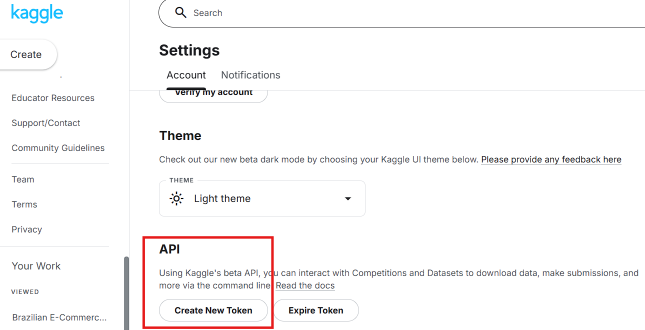

<u> **c) Configure Kaggle and Google Cloud** </u>

In [ ]:
#!pip install kaggle

#Kaggle configurations
kaggle_data_path = "olistbr/brazilian-ecommerce" #info can be found on Kaggle
kaggle_data_set = "brazilian-ecommerce.zip"

#for uploading of csv files
#!pip install --upgrade google-cloud-bigquery google-cloud-storage

#for dl of sql tables
#!pip install sqlalchemy 
#!pip install db-dtypes
#!pip install google-cloud-bigquery-storage

from google.cloud import storage
from google.oauth2 import service_account
from google.api_core.exceptions import NotFound

#google cloud configurations
PROJECT_ID = "<insert>"
BUCKET_NAME = "<insert>" # must be globally unique
LOCATION = "us"  # or your desired region
prefix = "<insert>"  # Folder with CSV files on google storage
dataset_name = "<insert>"  # Desired dataset name in BigQuery



<u> **d) Set Up Key for Service Account in Google Cloud Storage** </u>

To facilitate the uploading of the CSV data to Google storage bucket, we needed the JSON key from the service account of the project used. 

Whilst we used back the token that was created for an earlier class, it is important to note that if this wasn't available, it would be necessary to set up the service account under the IAM page in Google Cloud, create and download the key accordingly into download_directory (as defined earlier).

In [ ]:
#define key
SERVICE_ACCOUNT_FILE = f'{download_directory}/"<insert json file>"'


<u> **e) Grant Bucket Creation and Read Permission** </u>

Required permissions were added to allow for the creation of a cloud storage bucket for which the data will be stored and read access. The following commands were run:



In [ ]:
#add storage permission
!gcloud projects add-iam-policy-binding {PROJECT_ID} \
  --member="serviceAccount:bigquery-admin@{PROJECT_ID}.iam.gserviceaccount.com" \
  --role="roles/storage.admin"


<u> **f) Create the Google Storage Bucket** </u>

A Google Storage Bucket was created by running the following commands:



In [ ]:
from google.cloud import storage
from google.oauth2 import service_account
from google.api_core.exceptions import NotFound

#!gcloud auth activate-service-account bigquery-admin@rinniedsai.iam.gserviceaccount.com --key-file={download_directory}/'rinniedsai-7d2e1f39990d.json'
# --- Load credentials ---
credentials = service_account.Credentials.from_service_account_file(SERVICE_ACCOUNT_FILE)
client = storage.Client(credentials=credentials, project=PROJECT_ID)

# --- Check if bucket exists ---
try:
    bucket = client.get_bucket(BUCKET_NAME)
    print(f"⚠️ Bucket '{BUCKET_NAME}' already exists.")
except NotFound:
    # Create the bucket
    bucket = client.bucket(BUCKET_NAME)
    new_bucket = client.create_bucket(bucket, location=LOCATION)
    print(f"✅ Bucket '{BUCKET_NAME}' created in {new_bucket.location}")

  

<u> **g)  Download the Kaggle Dataset and Unzip Zipped Folder** </u>

The zipped file was downloaded via the Kaggle token and unzipped into the specified local directory by running the following commands:



In [ ]:
# 1. Copy kaggle.json to kaggle_directory
!cp {download_directory}/kaggle.json {kaggle_directory}

# 2. Set permissions on kaggle.json
!chmod 600 {kaggle_directory}/kaggle.json

# 3. Download dataset using Kaggle CLI
#!kaggle datasets download {kaggle_data_path} -p {my_csv_files_directory}

# 4. Delete any existing .csv files in the target directory
!rm -f {my_csv_files_directory}/*.csv

# 5. Unzip the dataset into the target directory
!unzip -o {my_csv_files_directory}/brazilian-ecommerce.zip -d {my_csv_files_directory}

# 6. Copy CSV files to backup directory using shell command
!cp {my_csv_files_directory}/*.csv {org_csv_files_from_source_directory}/

# 7. Count and print number of CSV files
csv_files = [f for f in os.listdir(my_csv_files_directory) if f.endswith('.csv')]
print(f"Number of CSV files found and backed up: {len(csv_files)}")


<u> **h) Do some Data Cleaning and Validation** </u>

Before uploading the data to Google Storage, some data cleaning and validation were performed as follows:

> 1) *olist_order_reviews_dataset.csv*: Put **double quotations for freeform text** in cells in the review_comment_title and review_comment_message columns
> 2) *all csvs*: **Trim** all string data,
> 3) *all csvs*: **Drop any duplicate rows** (i.e. rows that are exactly across all columns),
> 4) *all csvs*: **Check the first column for unique, non-null values**, as the first column looks likely to be the primary key, and
> 5) *olist_geolocation_dataset.csv* : Check that the **latitudes and longitudes are within the minimum and maximum latitudes and longitudes of Brazil**.
> 6) *all csvs*: Convert the data type to datetime for columns with names containing "date" or "timestamp" or "approved at".
     <br> Check that these columns have **dates that are between 2016 and 2018 inclusive**, since the dataaser is supposed to only contain 2016-2018 data.
     <br> Also check that if the csv file has 2 or more datetime columns, the **first datetime column contains the earliest date** amongst all datetime columns in the same file, and
>  7) *olist_orders_dataset.csv*: **Delivery date cannot be earlier than shipped date**. **Delivery date cannot be null if order status is marked as "delivered".**  
> 8) *all csvs*: Check that columns with names containing **"price" or "value" are non-negative**

Based on the results below, **steps 4 to 7 required further checks**.

<div class="alert alert-block alert-info">  Step 4: Four csv files (olist_order_reviews_dataset.csv, olist_order_payments_dataset.csv, olist_geolocation_dataset.csv and olist_order_items_dataset.csv) failed the first columnm non-unique check.
<br> Step 5: 27 rows from olist_geolocation_dataset.csv failed the lat/long check 
<br> Step 6: 4 rows from the olist_order_items_dataset.csv failed the year range check. 166 rows from the olist_orders_dataset.csv failed the earliest date check.
<br> Step 7: 23 and 8 rows from the olist_orders_dataset.csv failed delivery date cannot be earlier than shipping date test and the non-null delivery date for delivered orders test </div>

In [ ]:
import pandas as pd
import os

def clean_csv_files_in_directory(my_csv_files_directory):
    files = [f for f in os.listdir(my_csv_files_directory) if f.endswith('.csv')]
    
    summary_data = []
    first_col_issues = {}
    earliest_date_issues = {}
    year_range_issues = {}
    negative_value_issues = {}
    geolocation_issues = {}

    # Latitude and Longitude boundaries for Brazil
    min_latitude = -33.75
    max_latitude = 5.27
    min_longitude = -73.99
    max_longitude = -29.35

    for file in files:
        file_path = os.path.join(my_csv_files_directory, file)
        df = pd.read_csv(file_path)

        # Process review comments for specific dataset
        if file == 'olist_order_reviews_dataset.csv':
            for col in ['review_comment_title', 'review_comment_message']:
                if col in df.columns:
                    df[col] = df[col].apply(lambda x: f'"{x}"' if pd.notnull(x) else x)

        # Strip whitespace from string columns
        for col in df.columns:
            if df[col].dtype == object:
                df[col] = df[col].map(lambda x: x.strip() if isinstance(x, str) else x)

        rows_before = len(df)
        df_cleaned = df.drop_duplicates()
        rows_after = len(df_cleaned)

        # Convert date columns
        date_columns = [col for col in df_cleaned.columns if any(key in col.lower() for key in ['date', 'timestamp', 'approved_at'])]
        converted_columns = []
        for col in date_columns:
            try:
                df_cleaned[col] = pd.to_datetime(df_cleaned[col], errors='coerce')
                if pd.api.types.is_datetime64_any_dtype(df_cleaned[col]):
                    converted_columns.append(col)
            except:
                continue

        # Primary key sanity checks
        first_column = df_cleaned.columns[0]
        null_values = df_cleaned[first_column].isnull().sum()
        duplicate_values = df_cleaned[first_column].duplicated().sum()

        if null_values > 0 or duplicate_values > 0:
            prob_rows = df_cleaned[df_cleaned[first_column].isnull() | df_cleaned[first_column].duplicated(keep=False)]
            first_col_issues[file] = prob_rows
            prob_path = os.path.join(my_csv_files_directory, f"{file.replace('.csv', '')}_csv_problematic_rows.csv")
            prob_rows.to_csv(prob_path, index=False)

        # Geolocation Check
        geolocation_fail_count = 0
        if file == 'olist_geolocation_dataset.csv':
            if 'geolocation_lat' in df_cleaned.columns and 'geolocation_lng' in df_cleaned.columns:
                df_cleaned['geolocation_lat'] = pd.to_numeric(df_cleaned['geolocation_lat'], errors='coerce')
                df_cleaned['geolocation_lng'] = pd.to_numeric(df_cleaned['geolocation_lng'], errors='coerce')

                geolocation_fail_rows = df_cleaned[
                    (df_cleaned['geolocation_lat'] < min_latitude) | 
                    (df_cleaned['geolocation_lat'] > max_latitude) |
                    (df_cleaned['geolocation_lng'] < min_longitude) | 
                    (df_cleaned['geolocation_lng'] > max_longitude)
                ]
                geolocation_fail_count = geolocation_fail_rows.shape[0]

                if geolocation_fail_count > 0:
                    geolocation_issues[file] = geolocation_fail_rows
                    geolocation_fail_path = os.path.join(my_csv_files_directory, f"{file.replace('.csv', '')}_geolocation_failed_rows.csv")
                    geolocation_fail_rows.to_csv(geolocation_fail_path, index=False)

        # ✅ Negative Value Check (only for 'price' or 'value' columns)
        negative_value_fail_count = 0
        keyword_cols = [col for col in df_cleaned.columns 
                        if 'price' in col.lower() or 'value' in col.lower()]

        keyword_numeric_cols = [col for col in keyword_cols 
                                if pd.api.types.is_numeric_dtype(df_cleaned[col])]

        negative_fail_rows = pd.DataFrame()
        if keyword_numeric_cols:
            mask = (df_cleaned[keyword_numeric_cols] < 0).any(axis=1)
            negative_fail_rows = df_cleaned[mask]
            negative_value_fail_count = negative_fail_rows.shape[0]

        if negative_value_fail_count > 0:
            negative_value_issues[file] = negative_fail_rows
            negative_fail_path = os.path.join(my_csv_files_directory, f"{file.replace('.csv', '')}_negative_value_check_failed_rows.csv")
            negative_fail_rows.to_csv(negative_fail_path, index=False)

        # Earliest date check
        earliest_date_fail_count = 0
        earliest_date_failed_columns = []
        if len(converted_columns) >= 2:
            first_datetime_col = converted_columns[0]
            fail_rows = []
            column_fail_counts = {col: 0 for col in converted_columns[1:]}

            for idx, row in df_cleaned.iterrows():
                base = row[first_datetime_col]
                if pd.isnull(base):
                    continue
                for col in converted_columns[1:]:
                    if pd.notnull(row[col]) and row[col] < base:
                        column_fail_counts[col] += 1
                        fail_rows.append(row)
                        break

            earliest_date_failed_columns = [col for col, count in column_fail_counts.items() if count > 0]
            earliest_date_fail_count = sum(column_fail_counts.values())

            if fail_rows:
                fail_rows_df = pd.DataFrame(fail_rows)
                fail_rows_path = f"{my_csv_files_directory}/{file.replace('.csv', '')}_earliest_date_check_failed_rows.csv"
                fail_rows_df.to_csv(fail_rows_path, index=False)

        # Special logic for orders dataset
        order_delivered_customer_date_earlier_than_shipped_fail_count = 0
        order_delivered_customer_date_null_fail_count = 0
        if file == 'olist_orders_dataset.csv':
            if 'order_delivered_carrier_date' in df_cleaned.columns and 'order_delivered_customer_date' in df_cleaned.columns:
                df_cleaned['order_delivered_carrier_date'] = pd.to_datetime(df_cleaned['order_delivered_carrier_date'], errors='coerce')
                df_cleaned['order_delivered_customer_date'] = pd.to_datetime(df_cleaned['order_delivered_customer_date'], errors='coerce')

                failed_rows = df_cleaned[df_cleaned['order_delivered_customer_date'] < df_cleaned['order_delivered_carrier_date']]
                order_delivered_customer_date_earlier_than_shipped_fail_count = failed_rows.shape[0]

                if order_delivered_customer_date_earlier_than_shipped_fail_count > 0:
                    failed_rows_path = os.path.join(my_csv_files_directory, f"{file.replace('.csv', '')}_customer_delivery_earlier_than_shipped.csv")
                    failed_rows.to_csv(failed_rows_path, index=False)

                null_fail_rows = df_cleaned[
                    (df_cleaned['order_status'] == 'delivered') &
                    df_cleaned['order_delivered_customer_date'].isnull()
                ]
                order_delivered_customer_date_null_fail_count = null_fail_rows.shape[0]

                if order_delivered_customer_date_null_fail_count > 0:
                    null_fail_rows_path = os.path.join(my_csv_files_directory, f"{file.replace('.csv', '')}_customer_delivery_null_when_delivered.csv")
                    null_fail_rows.to_csv(null_fail_rows_path, index=False)

        # Summary row for current file
        summary_data.append({
            'File Name': file,
            'No. of Duplicate Rows': rows_before - rows_after,
            'Old Number of Rows': rows_before,
            'New Number of Rows': rows_after,
            'Number of Columns Converted to DateTime': len(converted_columns),
            'Columns Converted to DateTime': ', '.join(converted_columns),
            'Assumed Primary Key (First Column)': first_column,
            'Primary Key Test: First Column with Nulls': null_values,
            'Primary Key Test: First Column with Duplicates': duplicate_values,
            'Earliest Date Check Fail Count': earliest_date_fail_count,
            'Earliest Date Failed Columns': ', '.join(earliest_date_failed_columns),
            'Order Delivered Customer Date Earlier Than Shipped Fail Count': order_delivered_customer_date_earlier_than_shipped_fail_count,
            'Order Delivered Customer Date Null Fail Count': order_delivered_customer_date_null_fail_count,
            'Geolocation Check Fail Count': geolocation_fail_count,
            'Negative Value Test': negative_value_fail_count
        })

        # Save cleaned file
        df_cleaned.to_csv(file_path, index=False)

    # Display final summary
    if summary_data:
        summary_df = pd.DataFrame(summary_data)
        print("📊 Summary Data")
        display(summary_df)
    else:
        print("No summary data to display!")

clean_csv_files_in_directory(my_csv_files_directory)


### a) Primary Key Check
Looking at the output from  the cell above, there were **4 tables that contained duplicate values in their first respective first columns**. These required further investigation and the findings are summarised below. 



| # | Dataset                             | Number of Duplicate Values in First Column | Reason                                                                                                                                                                                                                                                                                                                         | Proposed Solution                                                                                        |
| - | ----------------------------------- | ------------------------------------------ | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ | -------------------------------------------------------------------------------------------------------- |
| 1 | olist\_order\_reviews\_dataset.csv  | 814                                        | One `review_id` could have multiple `order_id`s, which does not seem to make sense. In this dataset `order_id` also cannot be primary key as one `order_id` can have mulitple `review_id`s i.e. there are duplicate values for `order_id`. See example below.  | Remove duplicate `review_id` rows by attempting to tag each review to the correct `order_id`.            |
| 2 | olist\_order\_payments\_dataset.csv | 4,446                                      | One `order_id` can have multiple `payment_sequential` values because a customer may pay using multiple payment methods, creating a sequence for each payment.                                                                                                                                                                  | Create a composite primary key combining `order_id` and `payment_sequential`. Then aggregate `payment_value` by `order_id`                           |
| 3 | olist\_geolocation\_dataset.csv     | 719,317                                    | One 5-digit zip code can correspond to multiple similar latitude/longitude coordinates. Brazilian zip codes are 8 digits, but `geolocation_zip_code_prefix` contains only 5-digit zip codes, which represent broader areas. The detailed 8-digit codes may have been masked for confidentiality, as a more granular zipcodes could lead to the identification of the customer or seller. (Zipocdes in the customer and seller datasets are also 5-digit. Hence, this could explain why                                                              | For analysis, keep only the first row for each repeated zip code, as approximate location is sufficient. |
| 4 | olist\_order\_items\_dataset.csv    | 13,984                                     | One `order_id` can have multiple `order_item_id`.   The latter is a sequential number identifying number of items included in the same order.                                                                                                                                                                                                                                                                                                   | Create a composite primary key combining `order_id` and `order_item_id`. Then  aggregate `price` by order_id                        |                                    |



<div class="alert alert-block alert-info"> 
olist_order_reviews_dataset.csv: An example when one order_id can have multiple review_ids. 

It appears that a different review was done for each of the items in the order that arrived at different timings despite being ordered together.
</div>

| review_id                           | order_id                           | review_score | review_comment_message                                                                                                                                               | English Translation                                                                                                                   |
|-------------------------------------|------------------------------------|--------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------|
| b04ed893318da5b863e878cd3d0511df    | 03c939fd7fd3b38f8485a0f95798f1f6  | 3            | "Um ponto negativo que achei foi a cobrança de 3 taxas de entregas, sendo que comprei os 3 produtos iguais numa só compra. E mesmo comprando os produtos juntos, chegaram separados." | "A negative point I found was the charging of 3 delivery fees, even though I bought the 3 identical products in a single purchase. And even though I bought the products together, they arrived separately." |
| f4bb9d6dd4fb6dcc2298f0e7b17b8e1e    | 03c939fd7fd3b38f8485a0f95798f1f6  | 4            |                                                                                                                                                                      |                                                                                                                                        |
| 405eb2ea45e1dbe2662541ae5b47e2aa    | 03c939fd7fd3b38f8485a0f95798f1f6  | 3            | "Seria ótimo se tivessem entregue os 3 (três) pedidos de uma única vez."                                                                                             | "It would have been great if they had delivered all 3 (three) orders at once."                                                        |


<div class="alert alert-block alert-info">  olist_order_reviews_dataset.csv: To see how duplicate `review_id`s could be removed from the olist_order_reviews_dataset.csv, the csv file was merged with the data from the olist_orders_dataset.csv using `order_id` as the key. 


The difference between the review_creation_date and the delivery date (earlier of `'order_delivered_customer_date` and `order_estimated_delivery_date`). </div> The output showed that most of the reviews (~95k out of ~99k reviews) were **created within 2 days of the delivery date**. Hence, we can use this as a criterion to remove rows with duplicate `review_ids` and reviews were created **more than 2 days after product was delivered, i.e. if it was more than 2 days, then the review is assumed to be not tagged to the correct order_id** and thus removed. If duplicate review_ids still remain, then these rows are dropped as there is no other way to make a good assumption as to which order ID it can be tagged to. 1114 rows were eventually dropped (1.12% of the orginal reviews dataset.

### ai) Difference between Review Creation Date and Delivery Date

In [ ]:
# Load CSVs
df_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
df_orders = pd.read_csv('olist_orders_dataset.csv')

# Convert relevant columns to datetime
df_reviews['review_creation_date'] = pd.to_datetime(df_reviews['review_creation_date'], errors='coerce')
df_orders['order_delivered_customer_date'] = pd.to_datetime(df_orders['order_delivered_customer_date'], errors='coerce')
df_orders['order_estimated_delivery_date'] = pd.to_datetime(df_orders['order_estimated_delivery_date'], errors='coerce')

# Left join on order_id
df = pd.merge(df_reviews, df_orders, on='order_id', how='left')

# Create new column with earlier date between delivered and estimated delivery
df['earlier_delivery_date'] = df[['order_delivered_customer_date', 'order_estimated_delivery_date']].min(axis=1)

# Convert earlier_delivery_date back to datetime for subtraction
df['earlier_delivery_date'] = pd.to_datetime(df['earlier_delivery_date'])

# Calculate difference in days between review_creation_date and earlier_delivery_date
df['review_to_earlier_delivery_days'] = (df['review_creation_date'] - df['earlier_delivery_date']).dt.days

# Value counts for the difference
counts = df['review_to_earlier_delivery_days'].value_counts()
print(counts)



### aii) Removal of Duplicate Review IDs so that Review ID can now be Primary Key



In [ ]:
# Preserve original row count
original_row_count = len(df)

# Step 1: Mark duplicated review_ids
df['Dup_Review_ID'] = df.duplicated('review_id', keep=False).map({True: 'Y', False: 'N'})

# Step 2: Ensure 'review_to_earlier_delivery_days' is numeric
if 'review_to_earlier_delivery_days' not in df.columns:
    raise ValueError("Column 'review_to_earlier_delivery_days' not found in DataFrame.")

df['review_to_earlier_delivery_days'] = pd.to_numeric(df['review_to_earlier_delivery_days'], errors='coerce')

# Step 3: Identify and remove invalid duplicate rows
to_drop_condition_1 = (df['Dup_Review_ID'] == 'Y') & (~df['review_to_earlier_delivery_days'].isin([0, 1, 2]))
df_remaining = df[~to_drop_condition_1]

# Step 4: Drop remaining duplicate review_ids
to_drop_condition_2 = df_remaining.duplicated('review_id', keep=False)
df_cleaned = df_remaining[~to_drop_condition_2]

# Step 5: Combine all dropped rows
dropped_rows = pd.concat([
    df[to_drop_condition_1],
    df_remaining[to_drop_condition_2]
])
dropped_rows.to_csv('dropped_reviews.csv', index=False)

# Step 6: Print stats
num_dropped = len(dropped_rows)
percent_dropped = (num_dropped / original_row_count) * 100
new_row_count = len(df_cleaned)

print(f"🗑️ Total rows dropped: {num_dropped} ({percent_dropped:.2f}%)")
print(f"📊 Rows remaining after cleaning: {new_row_count}")

# Step 7: Final check
assert df_cleaned['review_id'].is_unique, "❌ review_id is still not unique!"

# Step 8: Drop unnecessary columns
columns_to_drop = [
    'order_approved_at', 
    'review_to_earlier_delivery_days',
    'Dup_Review_ID'
]
df_cleaned = df_cleaned.drop(columns=[col for col in columns_to_drop if col in df_cleaned.columns], errors='ignore')

# Step 9: Save cleaned file
df_cleaned.to_csv('olist_order_reviews_dataset_cleaned.csv', index=False)
print("✅ Cleaned dataset saved as 'olist_order_reviews_dataset_cleaned.csv'")


<div class="alert alert-block alert-info"> olist_geolocation_dataset.csv: Only the first row for each repeated zip code was kept , so geolocation_zip_code_prefix can be the primary key for this file. In addition, there were 27 rows that failed the longitude/latitude checks. These rows were also removed from the dataset.  </div>

In [ ]:

# Load the geolocation dataset
df_geolocation = pd.read_csv('olist_geolocation_dataset.csv')

# Latitude and Longitude boundaries for Brazil
min_latitude = -33.75
max_latitude = 5.27
min_longitude = -73.99
max_longitude = -29.35  # Easternmost point of Brazil (including islands)

# Condition to keep only rows that pass the latitude and longitude test
valid_geolocation = (
    (df_geolocation['geolocation_lat'] >= min_latitude) & 
    (df_geolocation['geolocation_lat'] <= max_latitude) & 
    (df_geolocation['geolocation_lng'] >= min_longitude) & 
    (df_geolocation['geolocation_lng'] <= max_longitude)
)

# Get the valid rows (those that pass the test)
df_geolocation_cleaned = df_geolocation[valid_geolocation]

# Get the failed rows (those that did not pass the test)
df_geolocation_failed = df_geolocation[~valid_geolocation]

# Print the number of failed rows
failed_row_count = df_geolocation_failed.shape[0]
print(f"Number of rows that failed the geolocation test: {failed_row_count}")

# Optionally, you can save the failed rows to a separate file for further inspection
df_geolocation_failed.to_csv('olist_geolocation_failed_rows.csv', index=False)

# Sort the cleaned data by 'geolocation_zip_code_prefix' and 'geolocation_lat'
df_geolocation_sorted = df_geolocation_cleaned.sort_values(by=['geolocation_zip_code_prefix', 'geolocation_lat'])

# Drop duplicates based on 'geolocation_zip_code_prefix' and keep the first row
df_geolocation_cleaned = df_geolocation_sorted.drop_duplicates(subset='geolocation_zip_code_prefix', keep='first')

# Save the cleaned geolocation dataset
df_geolocation_cleaned.to_csv('olist_geolocation_dataset_cleaned.csv', index=False)

print("Cleaned Geolocation Dataset:")
display(df_geolocation_cleaned.head())  # Optionally display the first few rows of the cleaned data



<div class="alert alert-block alert-info"> olist_order_payments_dataset.csv: Create a composite primary key combining order_id and payment_sequential. Then aggregate payment_value by order_id.
    
<br> olist_order_items_dataset.csv: Create a composite primary key combining order_id and order_item_id. Then aggregate price by order_id </div>


In [ ]:

# Load datasets
payments_df = pd.read_csv("olist_order_payments_dataset.csv")
items_df = pd.read_csv("olist_order_items_dataset.csv")

# ----------------------------------------
# Payments Dataset
# ----------------------------------------

# Composite key
payments_df["orderid_paymentseq_composite_key"] = payments_df["order_id"].astype(str) + "_" + payments_df["payment_sequential"].astype(str)

# Window function: total payment_value per order_id
payments_df["total_payment_value"] = payments_df.groupby("order_id")["payment_value"].transform("sum")

# Show only duplicate order_id values
dup_order_ids_payments = payments_df[payments_df.duplicated(subset=["order_id"], keep=False)]

print("🔁 Payment Rows with Duplicate order_id Values (Check Aggregation):")
display(dup_order_ids_payments.sort_values(["order_id", "payment_sequential"]))

# Save entire payments dataframe with added columns
payments_df.to_csv("olist_order_payments_dataset_cleaned.csv", index=False)

# ----------------------------------------
# Items Dataset
# ----------------------------------------

# Composite key
items_df["orderid_orderitemid_composite_key"] = items_df["order_id"].astype(str) + "_" + items_df["order_item_id"].astype(str)

# Window functions:
items_df["total_price"] = items_df.groupby("order_id")["price"].transform("sum")
items_df["total_freight_value"] = items_df.groupby("order_id")["freight_value"].transform("sum")

# Show only duplicate order_id values
dup_order_ids_items = items_df[items_df.duplicated(subset=["order_id"], keep=False)]

print("\n🔁 Items Rows with Duplicate order_id Values (Check Aggregation):")
display(dup_order_ids_items.sort_values(["order_id", "order_item_id"]))

# Save entire items dataframe with added columns
items_df.to_csv("olist_order_items_dataset_cleaned.csv", index=False)


### b) Earliest Date Check, Order Delivered Date Not Earlier Than Shipped Date Check, Delivery Date Not Null for Delivered Orders Check

166 rows in the failed this check in **olist_orders_dataset.csv** and they were all caused by the column `order_delivered_carrier_date`. The latter refers to the order posting timestamp, when it was handled to the logistic partner. Hence, it should not be earlier than the `order_purchase_timestamp`.

Looking at the 1st histogram, the difference between the 2 timestamps is very small most of the time. But given that in reality it seems almost impossible to hand the goods almost immediately to the logistics partner, all these `order_delivered_carrier_date` will be made null and the rows with the original carrier dates will be saved in a separate csv file for record purposes. A total of 166 rows would be changed.

Looking at the 2nd histogram, this seems to affirm that  `order_delivered_carrier_date` is problematic, as it also doesn't make sense for the shipping date to be later than the delivery date. So these dates will be made null and the rows with the original carrier dates will be saved in a separate csv file for record purposes.  A total of 23 rows would be changed. 

For the 7 rows with null deliveries despite orders being delivered, we will add a new column to indicate the delivery date was indeed missing from the original dataset.

### bi) Plotting the distribution

In [ ]:
import matplotlib.pyplot as plt
os.chdir(my_csv_files_directory)

# Load the CSV
file_path = 'olist_orders_dataset_earliest_date_check_failed_rows.csv'
df = pd.read_csv(file_path)

# Convert columns containing "date" or "timestamp" to datetime
date_cols = [col for col in df.columns if 'date' in col.lower() or 'timestamp' in col.lower()]
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Create a new column for difference (in days) between order_purchase_timestamp and order_delivered_carrier_date
df['no_of_days_earlier'] = (df['order_purchase_timestamp'] - df['order_delivered_carrier_date']).dt.total_seconds() / (24 * 3600)

# Show basic info about the new column
print("Delivery delay (days) range:")
print(f"Min: {df['no_of_days_earlier'].min()}")
print(f"Max: {df['no_of_days_earlier'].max()}")
print(f"Mean: {df['no_of_days_earlier'].mean()}")

# Plot histogram
plt.figure(figsize=(10,6))
plt.hist(df['no_of_days_earlier'].dropna(), bins=30, edgecolor='black')
plt.title('Histogram of Delivery Delay (days)')
plt.xlabel('Days between Purchase and Carrier Delivery')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()



In [ ]:
file_path = 'olist_orders_dataset_order_delivered_customer_date_earlier_than_shipped_failed.csv'
# Convert columns containing "date" or "timestamp" to datetime
date_cols = [col for col in df.columns if 'date' in col.lower() or 'timestamp' in col.lower()]
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Create a new column for difference (in days) between order_purchase_timestamp and order_delivered_carrier_date
df['no_of_days_earlier'] = (df['order_delivered_carrier_date'] - df['order_delivered_customer_date']).dt.total_seconds() / (24 * 3600)

# Show basic info about the new column
print("Difference:")
print(f"Min: {df['no_of_days_earlier'].min()}")
print(f"Max: {df['no_of_days_earlier'].max()}")
print(f"Mean: {df['no_of_days_earlier'].mean()}")

# Plot histogram
plt.figure(figsize=(10,6))
plt.hist(df['no_of_days_earlier'].dropna(), bins=30, edgecolor='black')
plt.title('Histogram of Delivery Delay (days)')
plt.xlabel('Days between Purchase and Carrier Delivery')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

### bii) replacing with NULL for problematic rows and adding a new indicator "missing_delivery_date_for_delivered_orders"

In [ ]:
import pandas as pd

# Load dataset
file_path = "olist_orders_dataset.csv"
df = pd.read_csv(file_path)

# Convert to datetime
df["order_purchase_timestamp"] = pd.to_datetime(df["order_purchase_timestamp"], errors='coerce')
df["order_delivered_carrier_date"] = pd.to_datetime(df["order_delivered_carrier_date"], errors='coerce')
df["order_delivered_customer_date"] = pd.to_datetime(df["order_delivered_customer_date"], errors='coerce')

# Create flag column for invalid carrier delivery dates
df["invalid_carrier_delivery"] = (
    (df["order_delivered_carrier_date"] < df["order_purchase_timestamp"]) |
    (df["order_delivered_customer_date"] < df["order_delivered_carrier_date"])
)
df["invalid_carrier_delivery"] = df["invalid_carrier_delivery"].apply(lambda x: "Y" if x else "N")

# Create missing delivery date indicator for delivered orders
df["missing_delivery_date_for_delivered_orders"] = (
    (df["order_status"] == 'delivered') & df["order_delivered_customer_date"].isnull()
)
df["missing_delivery_date_for_delivered_orders"] = df["missing_delivery_date_for_delivered_orders"].apply(lambda x: "Y" if x else "N")

# Extract invalid rows
invalid_rows = df[df["invalid_carrier_delivery"] == "Y"]

# Save invalid rows to a CSV
invalid_rows.to_csv("orders_with_invalid_delivery_dates.csv", index=False)

# Make order_delivered_carrier_date NULL (NaT) for invalid rows
df.loc[df["invalid_carrier_delivery"] == "Y", "order_delivered_carrier_date"] = pd.NaT

# Save modified dataset
df.to_csv("olist_orders_dataset_cleaned.csv", index=False)

# Print stats
invalid_count = len(invalid_rows)
total_count = len(df)
percent = (invalid_count / total_count) * 100

print(f"❌ Rows with invalid carrier delivery dates made NULL: {invalid_count}")
print(f"📊 As percentage of total: {percent:.2f}%")


### c) Year Range Check

A total of 4 rows failed the year range check in `shipping_limit_date' from olist_order_items_dataset.csv. Looking at the data, even though these dates were after 2018, it may be still reasonable to assume that these dates are as such since this just refers to the shipping limit date for handing the order over to the logistic partner. Hence, no change was made to this file.

| order_id                           | order_item_id | product_id                        | seller_id                          | shipping_limit_date | price | freight_value |
|------------------------------------|---------------|-----------------------------------|------------------------------------|----------------------|-------|----------------|
| 13bdf405f961a6deec817d817f5c6624   | 1             | 96ea060e41bdecc64e2de00b97068975 | 7a241947449cc45dbfda4f9d0798d9d0   | 2/5/2020 3:30        | 69.99 | 14.66          |
| 9c94a4ea2f7876660fa6f1b59b69c8e6   | 1             | 282b126b2354516c5f400154398f616d | 7a241947449cc45dbfda4f9d0798d9d0   | 2/3/2020 20:23       | 75.99 | 14.7           |
| c2bb89b5c1dd978d507284be78a04cb2   | 1             | 87b92e06b320e803d334ac23966c80b1 | 7a241947449cc45dbfda4f9d0798d9d0   | 4/9/2020 22:35       | 99.99 | 61.44          |
| c2bb89b5c1dd978d507284be78a04cb2   | 2             | 87b92e06b320e803d334ac23966c80b1 | 7a241947449cc45dbfda4f9d0798d9d0   | 4/9/2020 22:35       | 99.99 | 61.44          |


<u> **i) Upload the CSV Files to the Google Storage Bucket** </u>

Unwanted csv files were either moved to another directoty or deleted. 

The remaining csv files were uploaded onto Google Storage Bucket using gsutil:


In [ ]:
def move_problematic_csvs(source_dir, destination_dir):
    # Create destination directory if it doesn't exist
    if not os.path.exists(destination_dir):
        os.makedirs(destination_dir)

    # Define keywords to identify problematic files
    keywords = ['failed', 'invalid', 'problematic', 'dropped', 'earlier', 'null']

    # List all CSV files
    files = [f for f in os.listdir(source_dir) if f.endswith('.csv')]

    # Move files containing any of the keywords
    moved_files = []
    for file in files:
        if any(keyword in file.lower() for keyword in keywords):
            source_path = os.path.join(source_dir, file)
            destination_path = os.path.join(destination_dir, file)
            os.rename(source_path, destination_path)
            moved_files.append(file)

    # Print results
    if moved_files:
        print(f"✅ Moved {len(moved_files)} file(s):")
        for f in moved_files:
            print(f"  - {f}")
    else:
        print("ℹ️ No matching files found to move.")


move_problematic_csvs(my_csv_files_directory, problem_files__directory)


In [ ]:
def delete_unclean_versions(csv_directory):
    # List all CSV files in the directory
    all_csv_files = [f for f in os.listdir(csv_directory) if f.endswith('.csv')]
    
    # Find cleaned versions
    cleaned_files = {f.replace('_cleaned.csv', '') for f in all_csv_files if '_cleaned.csv' in f}

    deleted_files = []
    for file in all_csv_files:
        if file.endswith('_cleaned.csv'):
            continue  # Skip cleaned versions themselves
        
        base_name = file.replace('.csv', '')
        if base_name in cleaned_files:
            file_to_delete = os.path.join(csv_directory, file)
            os.remove(file_to_delete)
            deleted_files.append(file)

    # Report
    if deleted_files:
        print(f"🗑️ Deleted {len(deleted_files)} uncleaned file(s):")
        for f in deleted_files:
            print(f"  - {f}")
    else:
        print("✅ No uncleaned files found to delete.")

# Example usage:
delete_unclean_versions(my_csv_files_directory)


In [ ]:
def count_csv_rows(my_csv_files_directory):
    csv_files = [f for f in os.listdir(my_csv_files_directory) if f.endswith('.csv')]
    if not csv_files:
        print("📁 No CSV files found in the directory.")
        return

    print(f"{'File Name':<50} | {'Row Count'}")
    print("-" * 65)

    for file in sorted(csv_files):
        file_path = os.path.join(my_csv_files_directory, file)
        try:
            df = pd.read_csv(file_path)
            print(f"{file:<50} | {len(df):>9}")
        except Exception as e:
            print(f"{file:<50} | Error reading file: {e}")

count_csv_rows(my_csv_files_directory)


In [ ]:
#upload csv files
!gsutil -m cp {my_csv_files_directory}/*.csv gs://{BUCKET_NAME}/

#show file directory in google storage to check
!gsutil ls gs://{BUCKET_NAME}/


**j) Load the Files from Google Storage to BigQuery**

In [ ]:
from google.cloud import bigquery, storage

# Initialize clients
bq_client = bigquery.Client()
storage_client = storage.Client()

# Parameters
prefix = ''  # Folder with CSV files

# Full dataset ID
dataset_id = f"{PROJECT_ID}.{dataset_name}"

# 1. Create dataset if it does not exist
dataset = bigquery.Dataset(dataset_id)
dataset.location = "US"  # Set your region

dataset = bq_client.create_dataset(dataset, exists_ok=True)
print(f"Dataset '{dataset_id}' created or already exists.")

# 2. List CSV files in the bucket root
bucket = storage_client.bucket(BUCKET_NAME)
blobs = bucket.list_blobs(prefix=prefix)

# 3. Load each CSV into its own table
for blob in blobs:
    if blob.name.endswith('.csv'):
        gcs_uri = f'gs://{BUCKET_NAME}/{blob.name}'
        filename = blob.name.split('/')[-1]
        table_name = filename.replace('.csv', '')
        table_ref = bq_client.dataset(dataset_name).table(table_name)

        # Job configuration
        job_config = bigquery.LoadJobConfig(
            source_format=bigquery.SourceFormat.CSV,
            skip_leading_rows=1,  # Skip header row
            autodetect=True,  # Auto-detect schema
            write_disposition=bigquery.WriteDisposition.WRITE_APPEND,  # Append to existing table
             allow_quoted_newlines=True,  
            max_bad_records=1000000,  # Allow up to 1 million bad records (adjust as necessary)
            ignore_unknown_values=True  # Ignore extra unknown columns
        )

        print(f'Loading {gcs_uri} into {dataset_name}.{table_name}...')
        
        # Start the load job
        load_job = bq_client.load_table_from_uri(
            gcs_uri,
            table_ref,
            job_config=job_config
        )
        
        # Wait for the job to complete
        load_job.result()
        
        print(f'✅ Loaded {load_job.output_rows} rows into {dataset_name}.{table_name}')


**k) Check that Number of Rows Tally Between Bigquery Tables and Local CSV Files**

In [ ]:
# --- Configuration ---
project_id = PROJECT_ID
dataset_id = dataset_name
local_directory = my_csv_files_directory

# --- Initialize BigQuery Client ---
client = bigquery.Client(project=project_id)

# --- Function to count rows in a BigQuery table ---
def get_bq_row_count(table_id):
    query = f"SELECT COUNT(*) as row_count FROM `{project_id}.{dataset_id}.{table_id}`"
    query_job = client.query(query)
    return list(query_job.result())[0].row_count

# --- Comparison ---
results = []

for file in os.listdir(local_directory):
    if file.endswith(".csv"):
        local_path = os.path.join(local_directory, file)

        try:
            # Load local CSV into DataFrame
            df_local = pd.read_csv(local_path)
            local_row_count = len(df_local)
        except Exception as e:
            local_row_count = "⚠️ Error reading CSV"
            df_local = None

        # BigQuery table name (remove .csv)
        table_name = file.replace(".csv", "")

        try:
            bq_row_count = get_bq_row_count(table_name)
        except Exception as e:
            bq_row_count = "⚠️ Error querying BQ"

        # Match or not?
        if isinstance(local_row_count, int) and isinstance(bq_row_count, int):
            status = "✅ Match" if local_row_count == bq_row_count else "❌ Mismatch"
        else:
            status = "⚠️ Error"

        results.append({
            "CSV File": file,
            "Local Row Count": local_row_count,
            "BigQuery Table": table_name,
            "BigQuery Row Count": bq_row_count,
            "Status": status
        })

# --- Display Summary ---
summary_df = pd.DataFrame(results)
print(summary_df.to_string(index=False))


***
 # <span style="color:blue;"> 2. Data Warehouse Setup </span>
***

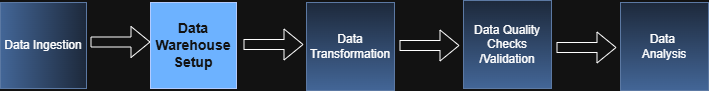

### Schema Implementation

After having performed some preliminary data checks and successfully loading the data in BigQuery, the next step will be to implement a schema. A schema organizing the data warehouse in a way that supports **efficient querying and reporting**. 

> This structure is essential for writing SQL queries that join the tables correctly. 
<br> It eplicitly **defines foreign keys** in fact tables that **reference primary keys** in dimension tables.
<br> It also provides a **business-friendly view of the data**, allowing one to understand what data is available and the linkages between the datasets.
<br> Last but not least, it **enforces consistency**.

To set a schema, we need to create **fact tables** and **dimension tables**. 

**Fact tables** are the **central** tables in star or snowflake schemas that store **quantitative data** — the measurable business facts. 

On the other hand, **dimension tables are the descriptive companions** to fact tables. They provide context to the measurable facts stored in the fact tables.

To determine what should be in the fact table for our project, a good starting point will be the relationhip diagram provided on Kaggle as seen below.It would appear that the **orders_dataset and the order_items_dataset are the central tables** and these two tables would be a good starting point for the creation of our fact table.


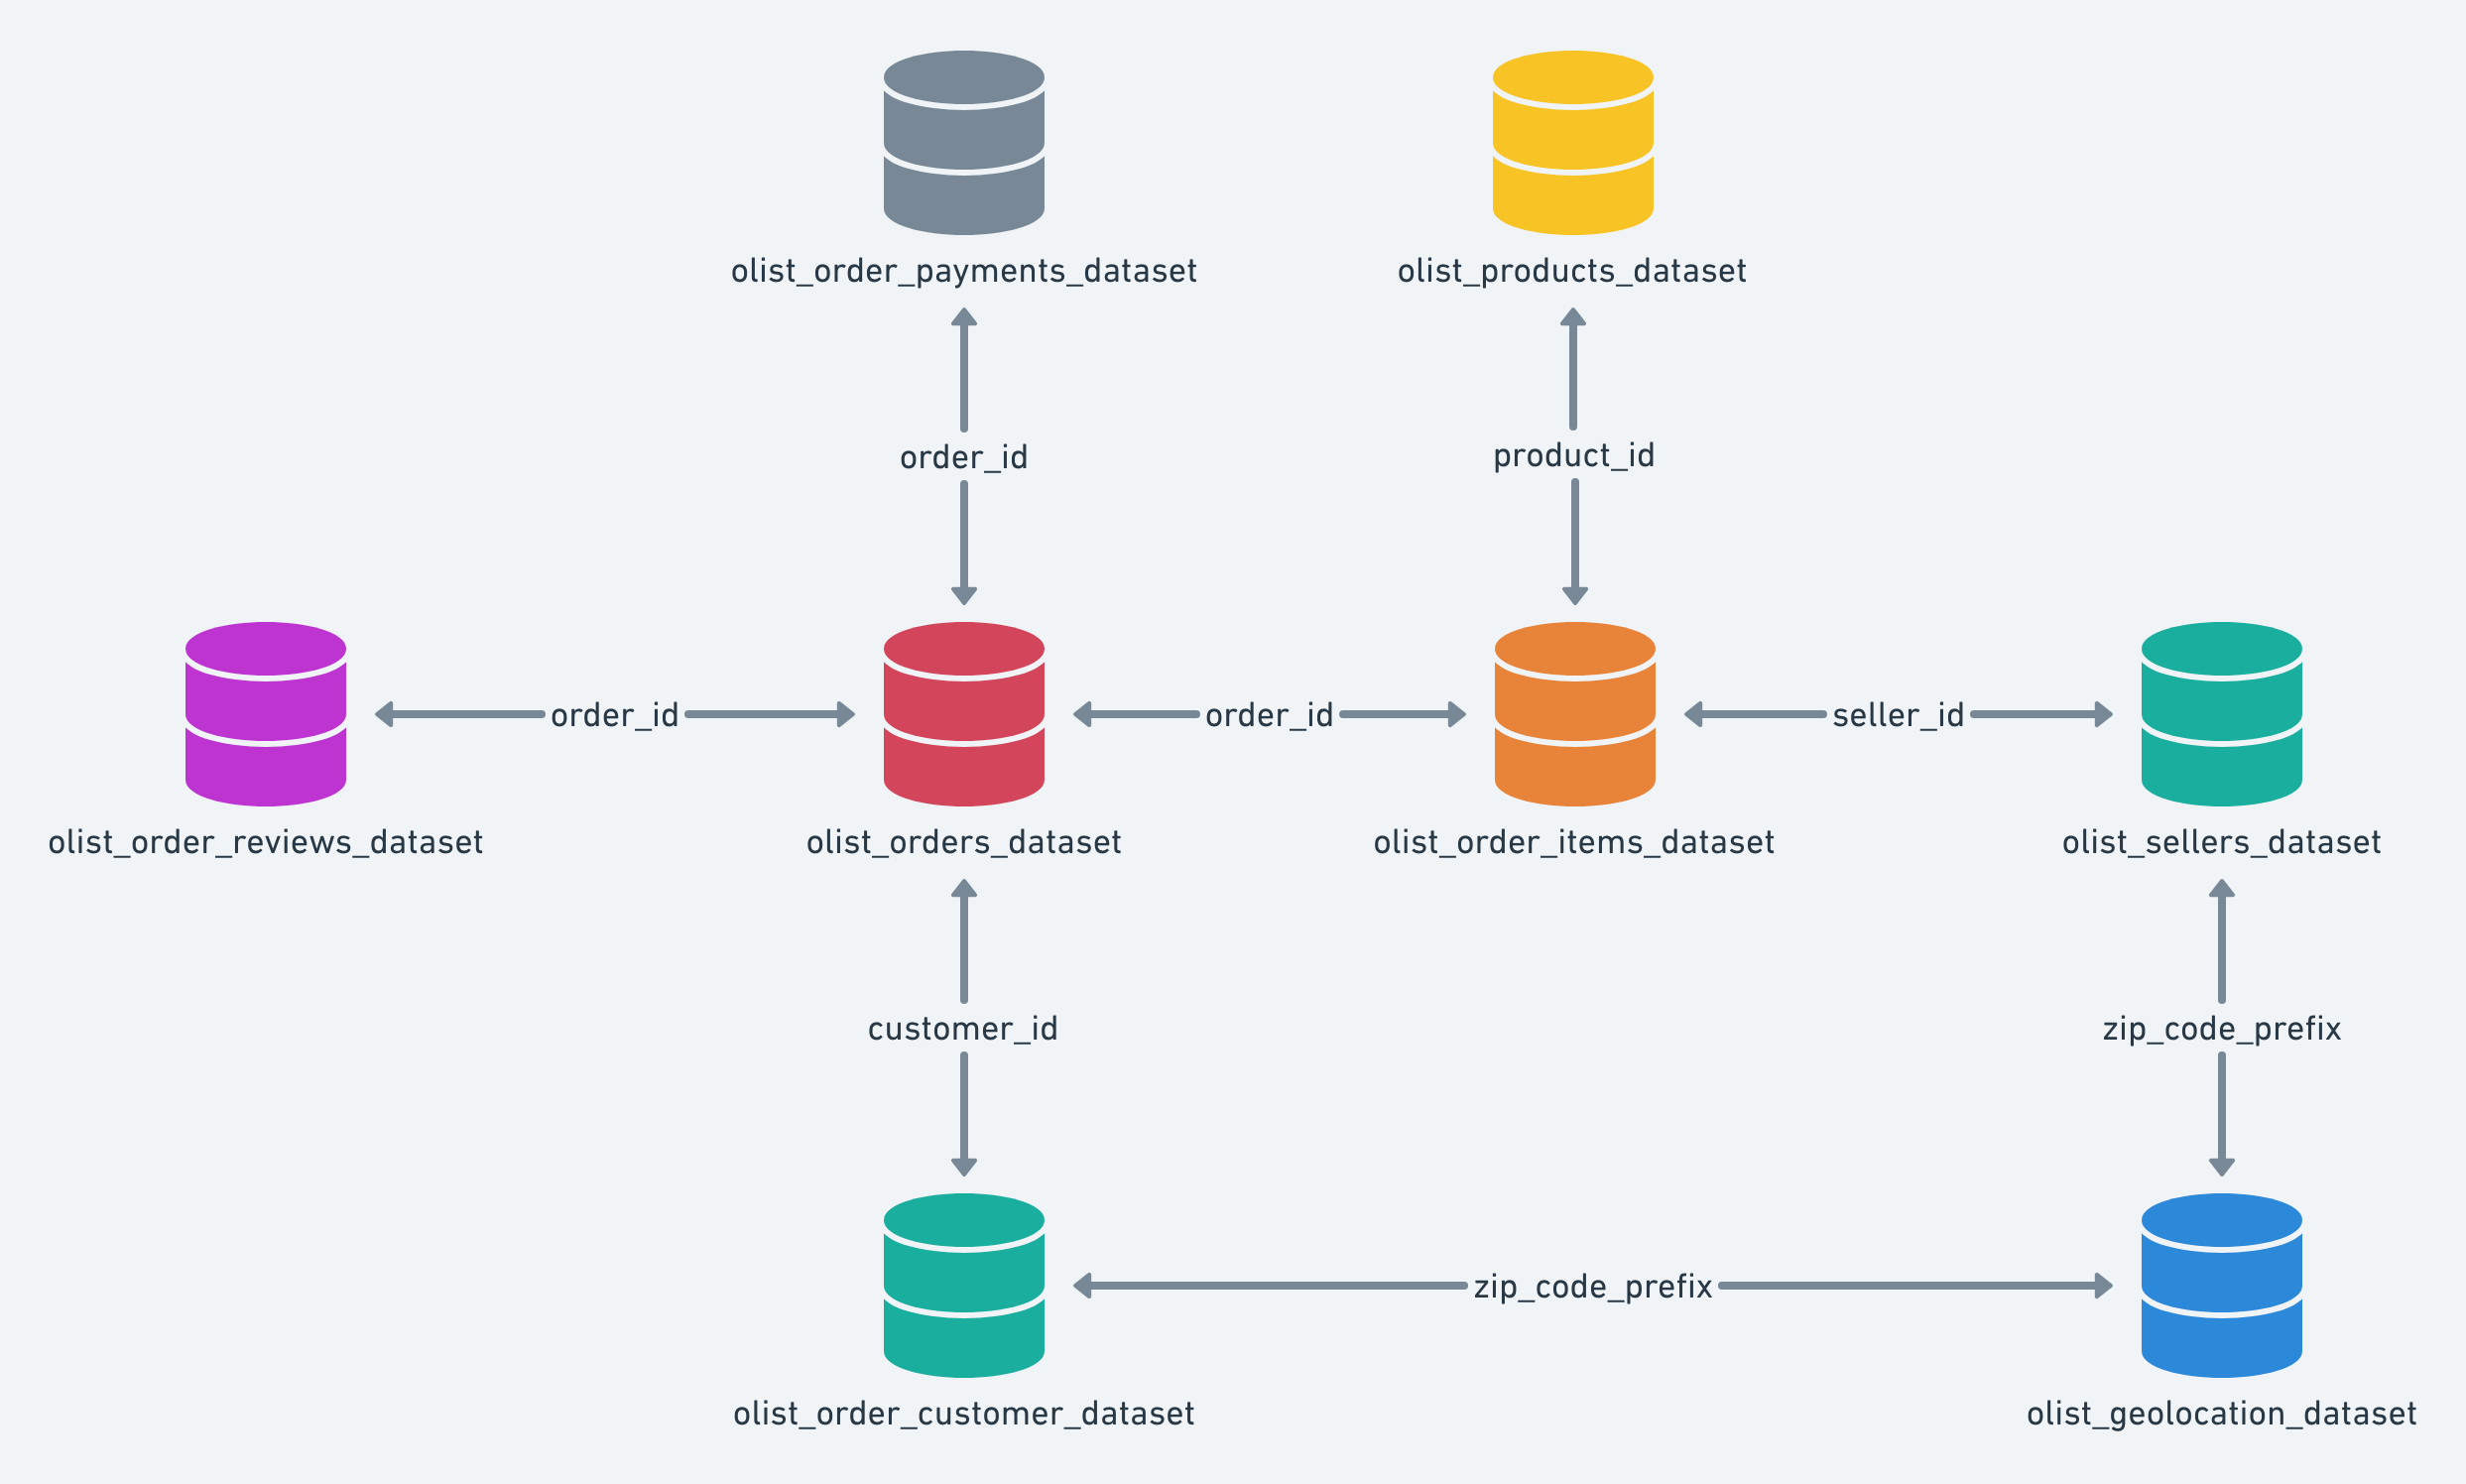

Looking at the fields available from the two datasets, we can form the **fact table** (One row per order_id) using the following columns from olise_orders and olise_order_items dataset as well as the 
<br> i) `customer_unique_id` from olist_order_customer dataset, 
<br> ii) `total_price` and `total_freight_value` from olist_order_items_dataset and 
<br> iii) `total_payment_value` from olist_order_payments dataset

Together, these form the most **critical data fields that will form a good base for analysis regarding dollar value metrics per customer or per order.**

### 🧾 Fact Table: `fact_orders`

| **Column Name**            | **Description**                                                                                            |
| -------------------------- | ---------------------------------------------------------------------------------------------------------- |
| `order_id`                 | Primary key of the fact table.                                                                             |
| `customer_id`              | Foreign key to the dim_customers table                      |
| `customer_unique_id`       | Useful for calculating metrics like rice, freight, payment per customer.                      |
| `order_purchase_timestamp` | Timestamp of when the order was placed. Useful for time-based aggregation.                                |
| `order_delivered_customer_date` | Timestamp of when order was delivered. Useful for time-based aggregation |
| `order_status`             | Status of the order (e.g., delivered, canceled). Useful for calculating revenue based on delivered orders. |
| `total_price`              | Total value of the items in the order (excluding freight). Calculated in the preliminary data cleaning earlier.                                                |
| `total_freight_value`      | Total freight cost associated with the order. Calculated in the preliminary data cleaning earlier.                                                              |
| `total_payment_value`      | Total transaction value associated with the order.  Calculated in the preliminary data cleaning earlier.                                                            |


The remaining columns from the 2 datasets can be used to form 2 dimension tables **dim_delivery_milestones** and **dim_order_details**. The `product_category_name` from the products_dataset and `product_category_name_english` from the product translation dataset can be added to **dim_order_details**. We will also retain `order_id`, `order_status`, `order_delivered_customer_date` and `order_purchase_timestamp` for **dim_delivery_milestones**. For **dim_order_details**, we also retain `order_id`, `total_price`, `total_freight_value` and `total_payment_value`.

### 🧾 Dimension Table: `dim_delivery_milestones`

| Column Name               | Description                                                                                          |
|---------------------------|------------------------------------------------------------------------------------------------------|
| `order_id`                | Primary key for this table and foreign key to the fact table                                                                        |
| `order_status`       | Status of the order|
| `order_purchase_timestamp` | Timestamp of when the order was placed
| `order_approved_at`       | Payment approval timestamp|
| `order_delivered_carrier_date`| Order posting timestamp                                                   |
| `order_delivered_customer_date`| Actual order delivery date                                 |
| `order_estimated_delivery_date ` | Estimated delivery date that was informed to customer                                                                |
| `invalid_carrier_delivery`     | Column to indicate whether order_delivered_carrier_date was made null becuase it was earlier than  order_purchase_timestamp in the raw data                                                                |


### 🧾 Dimension Table: `dim_order_details`


| Column Name                         | Description                                                                                           |
| ----------------------------------- | ----------------------------------------------------------------------------------------------------- |
| `orderid_orderitemid_composite_key` | Primary key for this dim table                                                                        |
| `order_id`                          | Foreign key to the fact table                                                                         |
| `order_item_id`                     | Sequential number identifying number of items included in the same order                              |
| `product_id`                        | Foreign key to dim\_product\_details                                                                  |
| `product_category_name`             | Root category of product, in Portuguese                                                               |
| `product_category_name_english`     | Category name in English                                                                              |
| `seller_id`                         | Foreign key to dim\_sellers                                                                           |
| `shipping_limit_date`               | Shows the seller shipping limit date for handling the order over to the logistic partner              |
| `price`                             | Item price                                                                                            |
| `freight_value`                     | Item freight value item (if an order has more than one item the freight value is split between items) |


Next, we can create the **dim_customers** and **dim_sellers** tables. The longitude and latitude data from the geolocation dataset can be added on to the dim tables.

### 🧾 Dimension Table: `dim_customers`

| Column Name               | Description                                                                                          |
|---------------------------|------------------------------------------------------------------------------------------------------|
| `customer_id`                |	Primary key for this table and foreign key to the fact table. An customer id generated for every order.                                                                       |
| `customer_unique_id `       | Unique customer ID|
| `customer_zip_code_prefix`| First five digits of customer zip code                                                 |
| `customer_city` | Customer City |
| `customer_state  ` | Customer State|
| `geolocation_lat` | Latitude of the customer's location                                |
| `geolocation_lng`     | Longitude of the customer's location |


### 🧾 Dimension Table: `dim_sellers`

| **Column Name**          | **Description**                      |
| ------------------------ | ------------------------------------ |
| `seller_id`              | Primary key of this table            |
| `seller_zip_code_prefix` | First five digits of seller zip code |
| `seller_city`            | Seller city                          |
| `seller_state`           | Seller state                         |
| `geolocation_lat`        | Latitude of the seller's location    |
| `geolocation_lng`        | Longitude of the seller's location   |


Last but not least, we will create the **dim_reviews**, **dim_payments** and **dim_product_details**. For the first two tables, we will include `customer_id` from dim_sellers. And for the last table, we will include `product_category_name_english` from the product translation dataset.

### 🧾 Dimension Table: `dim_reviews`

| Column Name               | Description                                                                                          |
|---------------------------|------------------------------------------------------------------------------------------------------|
| `review_id`                | Primary key of this table                                                                       |
| `order_id `       | Foreign key to the fact table |
| `customer_id`       | Foreign key to dim_customers  |
| `review_score`| Score ranging from 1 to 5 given by the customer on a satisfaction survey                                                 |
| `review_comment_title ` | Comment title from the review left by the customer, in Portuguese. |
| `review_comment_message` | Comment message from the review left by the customer, in Portuguese |
| `review_creation_date` | Shows the date in which the satisfaction survey was sent to the customer.                                |
| `review_answer_timestamp`     | Shows satisfaction survey answer timestamp |

### 🧾 Dimension Table: `dim_payments`

| Column Name               | Description                                                                                          |
|---------------------------|------------------------------------------------------------------------------------------------------|
| `orderid_paymentseq_composite_key` | Primary key of this table                                 |
| `order_id`                | Foreign key to the fact table                                                                        |
| `customer_id` | Foreign key to dim_customer |
| `payment_sequential `       | A customer may pay an order with more than one payment method. If he does so, a sequence will be created to accommodate all payments|
| `payment_type`| Method of payment chosen by the customer                                                 |
| `payment_installments` | Number of installments chosen by the customer |
| `payment_value` | Transaction value|



### 🧾 Dimension Table: `dim_product_details`

| Column Name               | Description                                                                                          |
|---------------------------|------------------------------------------------------------------------------------------------------|
| `product_id`                | Primary key for this table and foreign key to dim_order_details                                                                        |
| `product_category_name` | Root category of product, in Portuguese |
| `product_category_name_english` | Category name in English
| `product_name_lenght`       | Number of characters extracted from the product name|
| `product_description_lenght`| Number of characters extracted from the product description.                                                 |
| `product_photos_qty` | Number of product published photos |
| `product_weight_g` | Product weight measured in grams|
| `product_length_cm` | Product length measured in centimeters                                 |
| `product_height_cm` | Product height measured in centimeters                                |
| `product_width_cm` | Product width measured in centimeters                                |


In total, there is **one fact table** and **seven dimension tables** and they are linked as follows: 

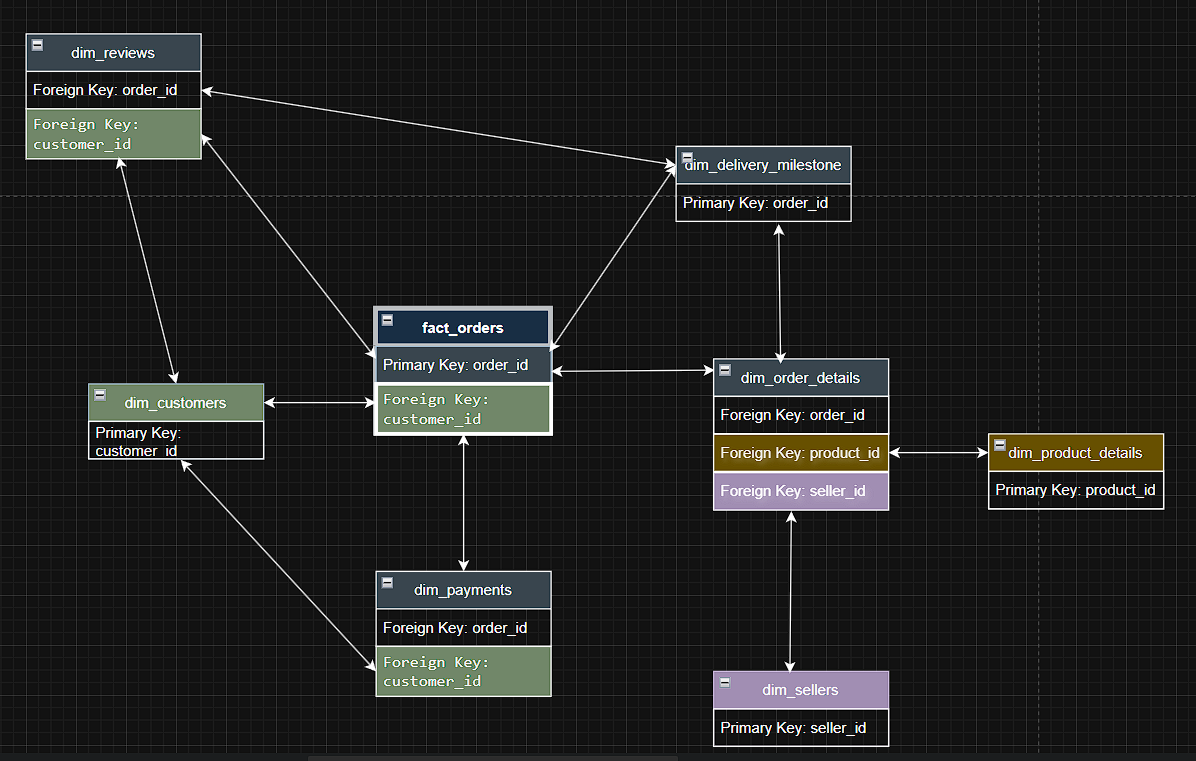

***
 # <span style="color:blue;"> 3. Data Transformation and 4. Date Quality Checks/Validation </span>
***

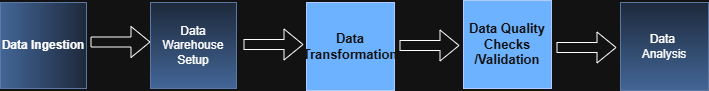

### Data Transformation

After creating the schema, we will be implementing this using DBT (Data Build Tool), which is an open-source framework for transforming and modeling data within a data warehouse. The main steps are as follows:

> 1. Initiate a DBT project using **dbt init**. This will create the necessary directory structure, configuration files, and sample models for the project.
> 2. Check the **dbt_project_yml** is referencing to the correct dataset in BigQuery.
> 3. Create a **profiles.yml** which store the configuration settings for your database connections, which includes connection details like:
  <br> a. Database type (e.g., Snowflake, Postgres, BigQuery, etc.)
> <br> b. Credentials (username, password, etc.)
> <br> c. Host, port, schema, and database details
> <br> d. Target configurations (e.g., development, production environments)
> <br> e. Connection parameters specific to the data warehouse
> 4. Under the models subfolder, create a **sources.yml** that will contain all the names and locations of the raw tables in BigQuery referenced in the fact and dim tables.
> 5. Run **dbt_debug** to test the connection to the raw tables
> 6. Create sql to make the fact and dim tables
> 7. Run **dbt_run** to create the sql tables on BigQuery
> 8. Create **packages.yml** to install the dbt packages required for data validation in step 9 (e.g. dbt_utils, dbt_expectations)
> 9. Under the models subfolder, create a **schema.yml** to define the relationships between the various tables as defined in the schema and to put in addtional data vallidation
> 10. Run **dbt_test** to perform the validation checks as specified in step 9


## Creation of the Fact Table fact_orders

After doing steps 1 to 5, the fact table `fact_orders` was created by joining data fields from 4 raw tables (see sql query below).

In [ ]:
SELECT DISTINCT  
    o.order_id,
    o.customer_id,
    c.customer_unique_id,
    o.order_purchase_timestamp,
    o.order_delivered_customer_date,
    o.order_status,
    round(i.total_price,2) AS total_price,
    round(i.total_freight_value,2) AS total_freight_value,
    round(p.total_payment_value,2) AS total_payment_value  

FROM {{ source('brazil_ecommerce', 'olist_orders_dataset_cleaned') }} AS o
LEFT JOIN `rinniedsai.brazil_ecommerce.olist_customers_dataset` AS c
    ON o.customer_id = c.customer_id
LEFT JOIN `rinniedsai.brazil_ecommerce.olist_order_items_dataset_cleaned` AS i
    ON o.order_id = i.order_id
LEFT JOIN `rinniedsai.brazil_ecommerce.olist_order_payments_dataset_cleaned` AS p
    ON o.order_id = p.order_id
ORDER BY o.order_idER BY o.order_id


### Creation of the Dim Tables

After creating the fact table, we proceeded to create the seven dim tables. Besides the original data fields, various new data fields were created to facilitate data analysis later.

### i) dim_delivery_milestones

Besides the original data fields, 4 new fields calcualting the difference in the **number of days between important delivery milestones** were also created. In addition, a binary variable ("Y"/"N") was also created for easy identification of later-than-expected deliveries.

In [ ]:
-- models/dim_delivery_milestones.sql

SELECT DISTINCT  
    order_id,
    order_status,
    order_purchase_timestamp, 
    order_approved_at,     
    order_delivered_carrier_date,
    order_delivered_customer_date,
    order_estimated_delivery_date,
    DATE_DIFF(order_delivered_carrier_date , order_purchase_timestamp, DAY) AS days_taken_to_ship,
    DATE_DIFF(order_delivered_customer_date , order_purchase_timestamp, DAY) AS days_taken_to_deliver,
    DATE_DIFF(order_delivered_customer_date, order_delivered_carrier_date, DAY) AS days_taken_to_deliver_after_shipping,
    DATE_DIFF(date(order_delivered_customer_date), order_estimated_delivery_date, DAY ) AS difference_in_day_btw_act_and_est_delivery,
    invalid_carrier_delivery,  
    CASE
        WHEN DATE_DIFF(date(order_delivered_customer_date), order_estimated_delivery_date, DAY ) > 0 THEN 'Y'
        ELSE 'N'
    END AS is_delivery_later_than_estimated

FROM {{ source('brazil_ecommerce', 'olist_orders_dataset_cleaned') }} 
ORDER BY order_id


### ii) dim_order_details

Besides obtaining the original data fields by joining the raw tables, we also created a few new data fields that sum **certain data by order** (e.g. number of items per order). 

In [ ]:
WITH category_list AS (
    SELECT
        od.order_id,
        ARRAY_TO_STRING(
            ARRAY_AGG(DISTINCT t.string_field_1 ORDER BY t.string_field_1),
            ', '
        ) AS product_category_names_english_list
    FROM {{ source('brazil_ecommerce', 'olist_order_items_dataset_cleaned') }} od
    LEFT JOIN `rinniedsai.brazil_ecommerce.olist_products_dataset` p
        ON od.product_id = p.product_id
    LEFT JOIN `rinniedsai.brazil_ecommerce.product_category_name_translation` t
        ON p.product_category_name = t.string_field_0
    GROUP BY od.order_id
),

order_item_details AS (
    SELECT
        od.orderid_orderitemid_composite_key,
        od.order_id,
        od.order_item_id,
        od.product_id,
        p.product_category_name,
        t.string_field_1 AS product_category_name_english,
        od.seller_id,
        od.shipping_limit_date,
        od.price,
        od.freight_value,
        od.total_price AS total_price_per_order,
        od.total_freight_value AS total_freight_value_per_order,

        -- Window functions to derive order-level metrics
        MAX(od.order_item_id) OVER (PARTITION BY od.order_id) AS number_of_items_in_order,
        COUNT(DISTINCT od.product_id) OVER (PARTITION BY od.order_id) AS number_of_distinct_products_in_order,
        COUNT(DISTINCT od.seller_id) OVER (PARTITION BY od.order_id) AS number_of_distinct_sellers_in_order,
        COUNT(DISTINCT t.string_field_1) OVER (PARTITION BY od.order_id) AS number_of_distinct_pdt_cat_in_order
    FROM {{ source('brazil_ecommerce', 'olist_order_items_dataset_cleaned') }} od
    LEFT JOIN `rinniedsai.brazil_ecommerce.olist_products_dataset` p
        ON od.product_id = p.product_id
    LEFT JOIN `rinniedsai.brazil_ecommerce.product_category_name_translation` t
        ON p.product_category_name = t.string_field_0
)

SELECT DISTINCT
    oid.orderid_orderitemid_composite_key,
    oid.order_id,
    oid.order_item_id,
    oid.number_of_items_in_order,
    oid.number_of_distinct_products_in_order,
    oid.number_of_distinct_sellers_in_order,
    oid.number_of_distinct_pdt_cat_in_order,
    oid.product_id,
    oid.product_category_name,
    oid.product_category_name_english,
    oid.seller_id,
    oid.shipping_limit_date,
    oid.price,
    oid.freight_value,
    oid.total_price_per_order,
    oid.total_freight_value_per_order,
    cl.product_category_names_english_list
FROM order_item_details oid
LEFT JOIN category_list cl
    ON oid.order_id = cl.order_id
ORDER BY oid.orderid_orderitemid_composite_key


### iii) dim_customers

The dim table was created by joining data from 2 raw tables to facilitate geo-location analysis.

In [ ]:
-- models/dim_customers.sql

SELECT DISTINCT  
    c.customer_id, 
    c.customer_unique_id,
    c.customer_zip_code_prefix,
    c.customer_city,
    c.customer_state,
    g.geolocation_lat AS customer_latitude,
    g.geolocation_lng AS customer_longitude

FROM {{ source('brazil_ecommerce', 'olist_customers_dataset') }} AS c
LEFT JOIN `rinniedsai.brazil_ecommerce.olist_geolocation_dataset_cleaned` AS g
    ON c.customer_zip_code_prefix = g.geolocation_zip_code_prefix
ORDER BY customer_id

### iv) dim_sellers

The dim table was created by joining data from 2 raw tables to facilitate geo-location analysis.

In [ ]:
-- models/dim_sellers.sql

SELECT DISTINCT  
    s.seller_id, 
    s.seller_zip_code_prefix,
    s.seller_city,
    s.seller_state,
    g.geolocation_lat AS seller_latitude,
    g.geolocation_lng AS seller_longitude

FROM {{ source('brazil_ecommerce', 'olist_sellers_dataset') }} AS s
LEFT JOIN `rinniedsai.brazil_ecommerce.olist_geolocation_dataset_cleaned` AS g
    ON s.seller_zip_code_prefix = g.geolocation_zip_code_prefix
ORDER BY seller_id

### v) dim_reviews

The dim table was created by joining data from 2 raw tables. One new data field to calculate the difference in the number of days between the 2 review-related date columns was added.

In [ ]:
SELECT DISTINCT
    r.review_id, 
    r.order_id,
    o.customer_id, 
    r.review_score,
    r.review_comment_title,
    r.review_comment_message,
    r.review_creation_date,
    r.review_answer_timestamp,
    DATE_DIFF(r.review_answer_timestamp, r.review_creation_date, DAY) AS days_taken_to_write_review

FROM {{ source('brazil_ecommerce', 'olist_order_reviews_dataset_cleaned') }} AS r
LEFT JOIN `rinniedsai.brazil_ecommerce.olist_orders_dataset_cleaned` AS o
    ON r.order_id = o.order_id
ORDER BY r.review_id


### vi) dim_payments

The dim table was created by joining data from 2 raw tables. Two new data fields were created to facilitate analysis per order.

In [ ]:
-- models/dim_payments.sql

SELECT DISTINCT  
    
    op.orderid_paymentseq_composite_key,
    op.order_id ,
    cu.customer_id,
    op.payment_sequential,
    op.payment_type,
    op.payment_installments,
    op.payment_value,
    max(op.payment_sequential) over (partition by op.order_id) as number_of_installments_per_order,
    sum(op.payment_value) over (partition by op.order_id, op.payment_type ) as payment_per_payment_type_per_order
    
    
FROM {{ source('brazil_ecommerce', 'olist_order_payments_dataset_cleaned') }} AS op
LEFT JOIN `rinniedsai.brazil_ecommerce.olist_orders_dataset_cleaned` AS cu
    ON op.order_id = cu.customer_id
ORDER BY orderid_paymentseq_composite_key

### vii) dim_product_details

The dim table was created by joining data from 2 raw tables.

In [ ]:
SELECT DISTINCT 
    
    p.product_id,
    p.product_category_name,
    t.string_field_1 AS product_category_name_english,
    p.product_name_lenght AS product_name_length,
    p.product_description_lenght AS product_description_length,
    p.product_photos_qty,
    p.product_weight_g,
    p.product_length_cm,
    p.product_height_cm,
    p.product_width_cm
        
FROM {{ source('brazil_ecommerce', 'olist_products_dataset') }} as p
LEFT JOIN `rinniedsai.brazil_ecommerce.product_category_name_translation` as t
  ON p.product_category_name = t.string_field_0
ORDER BY p.product_id

### Data Validation 

After running **dbt run** to create the eight SQL tables successfully, **dbt_utils and dbt_expectations were installed**. And the next step was to update the **schema.yml** to define the relationship between and to perform validation checks.

The relationship definition and validation checks are grouped into these following categories:

1) Defining the **primary keys** and ensuring that they are **unique and non-null**,
2) Defining the **foreign keys**,
3) Checks that certain data fields are **at least of/below a certain value** (dbt_utils),
4) Checks that **relationships (e.g. =, >=) between certain columns hold** (dbt_utils),
5) Checks that values are **not null based on certain conditions** (dbt_expectations)

In total, there were a **total of 37 tests**. 

**dbt test** was run and a total of 1 tests failed. The test that failed was:

1. Sum of total price and total freight value should equate to total payment value of the order when delivery status is "delivered" (569)

But given the relatively small number out of about 99000 orders, these rows can be dropped during the data analysis section.

In [ ]:
version: 2
# expression_is_true doesn't apply to individual columns. so it should be nested under models
models:
  - name: fact_orders
    description: "Fact table for orders."
    tests:
      - dbt_utils.expression_is_true:
          expression: "total_payment_value >= 0"
          expression: "CASE WHEN order_status='delivered' THEN ROUND(total_price + total_freight_value, 2) = ROUND(total_payment_value, 2)  ELSE TRUE END"
    columns:
      - name: order_id
        description: "The primary key for this table"
        tests:
          - unique
          - not_null
          - relationships:
              to: ref('dim_delivery_milestones')
              field: order_id
      - name: customer_id
        description: "The foreign key to dim_customers"
        tests:
          - unique
          - not_null
          - relationships:
              to: ref('dim_customers')
              field: customer_id              
      - name: total_price
        description: "The total price of the order"
        tests:
          - dbt_expectations.expect_column_values_to_not_be_null:
              where: "order_status = 'delivered'"
      - name: total_freight_value
        description: "The total freight value of the order"
        tests:
          - dbt_expectations.expect_column_values_to_not_be_null:
             where: "order_status = 'delivered'"

  - name: dim_delivery_milestones
    description: "Dimension table for delivery milestone dates"
    tests:
      - dbt_utils.expression_is_true:
          expression: "days_taken_to_deliver >= days_taken_to_ship"
    columns: 
      - name: order_id
        description: "The primary key for this table"
        tests:
          - unique
          - not_null
          - relationships:
              to: ref('fact_orders')
              field: order_id
    
  
  - name: dim_order_details
    description: "Dimension table for order details"
    tests: 
      - dbt_utils.expression_is_true:
          expression: "number_of_items_in_order > 0 AND number_of_distinct_products_in_order > 0 AND number_of_distinct_sellers_in_order > 0"
    columns: 
      - name: orderid_orderitemid_composite_key
        description: "The primary key for this table"
        tests:
          - unique
          - not_null
      - name: order_item_id
        tests: 
          - not_null
      - name: product_id 
        tests: 
          - not_null
      - name: seller_id
        tests: 
          - relationships:
             to: ref('dim_sellers')
             field: seller_id

  - name: dim_customers
    description: "Dimension table for customers"
    tests: 
      - dbt_utils.expression_is_true:
          expression: "customer_zip_code_prefix < 100000"
    columns: 
      - name: customer_id
        description: "The primary key for this table"
        tests:
          - unique
          - not_null
      - name: customer_unique_id
        tests:
          - not_null

  - name: dim_sellers
    description: "Dimension table for sellers"
    tests: 
      - dbt_utils.expression_is_true:
          expression: "seller_zip_code_prefix < 100000"
    columns: 
      - name: seller_id
        description: "The primary key for this table"
        tests:
          - unique
          - not_null
   
  - name: dim_reviews
    description: "Dimension table for reviews"
    tests: 
      - dbt_utils.expression_is_true:
          expression: "days_taken_to_write_review >= 1"
          expression: "review_score <= 5"
    columns: 
      - name: review_id
        description: "The primary key for this table"
        tests:
          - unique
          - not_null  
      - name: order_id
        tests: 
          - relationships:
             to: ref('fact_orders')
             field: order_id
      
  - name: dim_payments
    description: "Dimension table for payments"
    tests: 
      - dbt_utils.expression_is_true:
          expression: "payment_sequential >= 1"
          expression: "payment_installments >= 1"
          expression: "payment_per_payment_type_per_order >= 0"
    columns: 
      - name: orderid_paymentseq_composite_key
        description: "The primary key for this table"
        tests:
          - unique
          - not_null  
      - name: order_id
        tests: 
          - relationships:
             to: ref('fact_orders')
             field: order_id
      
  - name: dim_product_details
    description: "Dimension table for product details"
    tests: 
      - dbt_utils.expression_is_true:
          expression: "product_weight_g > 0"
          expression: "product_length_cm > 0"
          expression: "product_height_cm > 0"
          expression: "product_width_cm > 0"
          expression: "product_photos_qty >= 0"
    columns: 
      - name: product_id
        description: "The primary key for this table"
        tests:
          - unique
          - not_null  
          - relationships:
             to: ref('order_details')
             field: product_id
     


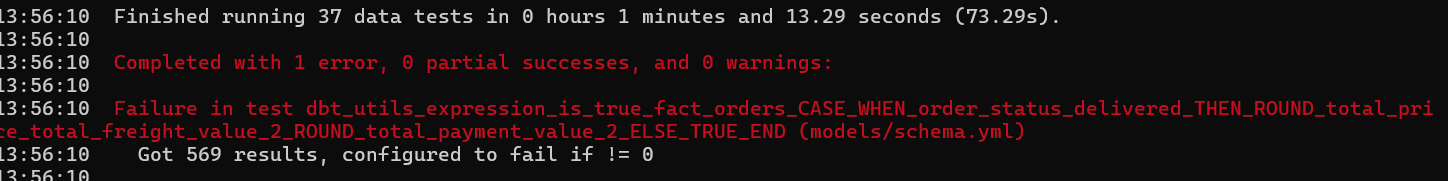

***
 # <span style="color:blue;"> 5. Data Analysis </span>
***

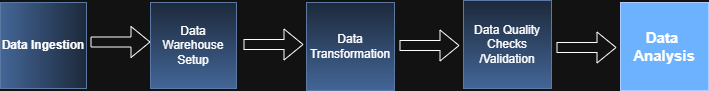

### Downloading of SQL Tables from BigQuey to Local Directory

After having created the SQL tables and running validation checks on them, the next step will be to download these sql tables to the local directory.

In [ ]:
import os
import pandas as pd
from google.cloud import bigquery
from sqlalchemy import create_engine

# Set up Google Cloud client and BigQuery connection
def get_bigquery_client():
    client = bigquery.Client()  # Ensure you have the correct credentials in your environment
    return client

# Fetch the list of tables that start with "fact_" or "dim_"
def fetch_table_names(client, project_id, dataset_id):
    query = f"""
        SELECT table_name
        FROM `{project_id}.{dataset_id}.INFORMATION_SCHEMA.TABLES`
        WHERE table_name LIKE 'fact_%' OR table_name LIKE 'dim_%'
    """
    tables = client.query(query).result()  # Execute the query to get table names
    return [table.table_name for table in tables]

# Download tables to CSV in the local directory
def download_tables(client, project_id, dataset_id, table_names, download_dir):
    if not os.path.exists(download_dir):
        os.makedirs(download_dir)
    
    downloaded_tables = []
    
    for table_name in table_names:
        # Load the table into a pandas DataFrame
        query = f"SELECT * FROM `{project_id}.{dataset_id}.{table_name}`"
        df = client.query(query).to_dataframe()

        # Save the DataFrame to CSV
        file_path = os.path.join(download_dir, f"{table_name}.csv")
        df.to_csv(file_path, index=False)
        downloaded_tables.append(table_name)
        print(f"Downloaded table: {table_name} to {file_path}")
    
    return downloaded_tables

def main():
    project_id = PROJECT_ID  # Replace with your Google Cloud project ID
    dataset_id = dataset_name  # Replace with your BigQuery dataset ID
    download_dir = sql_tables_from_bigquery_directory   # Local directory to store the downloaded tables

    # Initialize BigQuery client
    client = get_bigquery_client()

    # Fetch table names starting with 'fact_' or 'dim_'
    table_names = fetch_table_names(client, project_id, dataset_id)

    # Download the tables and save to CSV
    downloaded_tables = download_tables(client, project_id, dataset_id, table_names, download_dir)

    # Print the total number of tables downloaded
    print(f"\nTotal tables downloaded: {len(downloaded_tables)}")

if __name__ == "__main__":
    main()


### Importing csv to dfs

The csvs were then converted to dfs

In [ ]:

def import_csv_files(directory):
    # List all CSV files in the directory
    csv_files = [f for f in os.listdir(directory) if f.endswith('.csv')]
    
    # Loop through the CSV files and import them as DataFrames
    for file in csv_files:
        file_path = os.path.join(directory, file)
        
        # Load the CSV into a pandas DataFrame
        df = pd.read_csv(file_path)
        
        # Create a variable name for the DataFrame based on the file name (without the '.csv')
        df_name = file.replace('.csv', '')
        
        # Dynamically create a variable in the global scope
        globals()[df_name] = df
        
        print(f"Loaded DataFrame: {df_name}")

import_csv_files(sql_tables_from_bigquery_directory)

# After running this, each CSV file will be available as a separate variable in the global scope.


### Data Analysis and Actionables

### a) Checks for fact_orders

We start with **fact_orders** and we will filter the rows away that did not pass the dbt test earlier for the time being before doing EDA. 


In [ ]:
print("original fact_orders shape " + str(fact_orders.shape))

fact_orders_filtered = fact_orders[~(
    (fact_orders['order_status'] == 'delivered') &  # Apply the delivery status filter
    (round(fact_orders['total_price'] + fact_orders['total_freight_value'], 2) != round(fact_orders['total_payment_value'], 2)))
]

fact_orders_problematic = fact_orders[
    (fact_orders['order_status'] == 'delivered') &  # Apply the delivery status filter
    (round(fact_orders['total_price'] + fact_orders['total_freight_value'], 2) != round(fact_orders['total_payment_value'], 2))
]
print("fact_orders_filtered shape " + str(fact_orders_filtered.shape))
print(str(len(fact_orders_problematic)) + " rows were dropped")
fact_orders_filtered.head()

Next, null values were checked. The total_price and total_frieght_value had 775 null values each and these corresponded to orders that were not delivered. Hence, this is plausible.

In [ ]:
#checking of null values

for col in fact_orders_filtered.columns:
    print(f"{col}: {fact_orders_filtered[col].isnull().sum()}")

fact_orders_filtered_null = fact_orders_filtered[fact_orders_filtered.total_price.isnull()]
fact_orders_filtered_null.order_status.value_counts()

As we will be generating some general descriptive statistices from total_payment_value, it would be good to check for outliers and exclude them accordingly before doing the analysis. Based on the table below, a good cutoff point appears to be around the 99.95 percentile , which still allows for some possibly genuine high value transactions while eliminating those with extremely high values. So we will filter off from fact_orders_filtered orders accordingly.

In [ ]:
import numpy as np

# Remove max outlier if desired (optional)
values = fact_orders_filtered['total_payment_value']


# Define bins (you can adjust bins as needed)
bins = np.linspace(values.min(), values.max(), 11)  # 10 bins equally spaced

# Bin the data
counts, bin_edges = np.histogram(values, bins=bins)

# Create intervals for display
intervals = [f"{bin_edges[i]:.2f} - {bin_edges[i+1]:.2f}" for i in range(len(bin_edges)-1)]

# Calculate percentages and cumulative percentages
total = counts.sum()
percentages = counts / total * 100
cumulative_percentages = np.cumsum(percentages)

# Create summary DataFrame
hist_summary = pd.DataFrame({
    'Interval (BRL)': intervals,
    'Count': counts,
    'Percentage (%)': percentages.round(2),
    'Cumulative (%)': cumulative_percentages.round(2)
})

print(hist_summary)


In [ ]:
# Calculate the 99.95th percentile threshold
threshold = fact_orders_filtered['total_payment_value'].quantile(0.9995)

# Filter out the outliers above this threshold
fact_orders_outliers = fact_orders_filtered[fact_orders_filtered['total_payment_value'] > threshold]

# Keep only data within the threshold
fact_orders_filtered = fact_orders_filtered[fact_orders_filtered['total_payment_value'] <= threshold]

print(fact_orders_filtered.shape)
print(f"{len(fact_orders_outliers)} rows were dropped (above 99.95th percentile)")



### b) General Trends from fact_orders

<u> bi) Transaction Value and Number of Orders </u>

Looking at the charts below, the **transaction value and the number of orders per month (based on ordered marked "delivered") has been growing steadily** from 2016 to 2018, which suggests that the increase in transaction values is supported by the increase in the number of orders made.

The **top 5 months in terms of transaction values** were also the top 5 in the number of orders made. These months also **concided with major online shopping events or/and holidays involving gifting** in Brazil.

| Month   | Transaction Value (BRL) | Number of Orders Made | Average Value per Order Made | Possible Reason                                                                                                                                                                                                                                                                              |
| ------- | ----------------------: | --------------------: | ---------------------------: | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| 2017-11 |            1,126,507.38 |                 7,217 |                       156.09 | **Black Friday** - The biggest e-commerce event in Brazil, with massive discounts across all categories.<br>**Cyber Monday** - Focuses mainly on tech and electronics deals, extending the shopping frenzy.                                                                                  |
| 2018-04 |            1,114,837.22 |                 6,768 |                       164.72 | **Easter** - Big festive occasion in Brazil, many consumers buy chocolates, gifts, and decorations online.                                                                                                                                                                                   |
| 2018-05 |            1,109,180.15 |                 6,720 |                       165.06 | **Mother's Day** - One of the biggest gift-giving holidays, prompting spikes in gifts like perfumes, fashion, and electronics.                                                                                                                                                               |
| 2018-03 |            1,104,494.96 |                 6,973 |                       158.40 | **Consumer's Day** - Smaller event focused on consumer rights with some promotions.<br>**Carnival** - Many online purchases for costumes, party supplies, and travel leading up to the festival.<br>**Back-to-school Sales** - Seasonal sales on school supplies, uniforms, and electronics. |
| 2018-01 |            1,060,824.35 |                 7,010 |                       151.33 | **Post Christmas Sales** - Retailers offer discounts to clear leftover inventory from holiday season.                                                                                                                                                                                        |




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter delivered orders and aggregate monthly payments and counts
delivered_orders = fact_orders_filtered[fact_orders_filtered['order_status'] == 'delivered'].copy()
print(len(delivered_orders))
print(delivered_orders['customer_unique_id'].nunique())

# Convert timestamp column to datetime
delivered_orders['order_purchase_timestamp'] = pd.to_datetime(delivered_orders['order_purchase_timestamp'])

# Extract year-month for aggregation
delivered_orders['year_month'] = delivered_orders['order_purchase_timestamp'].dt.to_period('M').dt.to_timestamp()

# Aggregate total payments by month
monthly_payments = delivered_orders.groupby('year_month')['total_payment_value'].sum().reset_index()

# Aggregate number of orders by month
monthly_orders_count = delivered_orders.groupby('year_month').size().reset_index(name='order_count')

# Find the top 5 months by total_payment_value
top_5_payments_df = monthly_payments.nlargest(5, 'total_payment_value')
top_5_payments_months = top_5_payments_df['year_month'].tolist()

# Find the top 5 months by number of orders
top_5_orders_df = monthly_orders_count.nlargest(5, 'order_count')
top_5_orders_months = top_5_orders_df['year_month'].tolist()

# Print the top 5 months with their total payments
print("Top 5 months by total payment:")
for month, payment in zip(top_5_payments_df['year_month'], top_5_payments_df['total_payment_value']):
    print(f"{month.strftime('%Y-%m')}: {payment:.2f}")

# Print the top 5 months by number of orders
print("\nTop 5 months by number of orders:")
for month, count in zip(top_5_orders_df['year_month'], top_5_orders_df['order_count']):
    print(f"{month.strftime('%Y-%m')}: {count}")

# Colors for the bars - red if in top 5 for each metric, else grey
colors_payments = ['red' if month in top_5_payments_months else 'grey' for month in monthly_payments['year_month']]
colors_orders = ['red' if month in top_5_orders_months else 'grey' for month in monthly_orders_count['year_month']]

# Convert year_month to string for categorical x-axis
monthly_payments['year_month_str'] = monthly_payments['year_month'].dt.strftime('%Y-%m')
monthly_orders_count['year_month_str'] = monthly_orders_count['year_month'].dt.strftime('%Y-%m')

# Create figure and two subplots vertically with shared x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

bar_width = 0.6  # wider bars for better visibility

# Bar chart for total payments
ax1.bar(monthly_payments['year_month_str'], monthly_payments['total_payment_value'], color=colors_payments, width=bar_width)
ax1.set_ylabel('Transaction Value (BRL)', fontsize=12)
ax1.set_title('Transaction Value for Orders Made', fontsize=16)
ax1.tick_params(axis='x', rotation=45)

# Bar chart for number of orders
ax2.bar(monthly_orders_count['year_month_str'], monthly_orders_count['order_count'], color=colors_orders, width=bar_width)
ax2.set_xlabel('Month')
ax2.set_ylabel('Number of Orders', fontsize=12)
ax2.set_title('Number of Orders Made', fontsize=16)
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


<u> bii) Number of Customers </u>

The number of customers has also steadily grown from 2016 to 2018, and was around **93,000 as at Aug-2018**. And from the chart, it would at first glance seem that that the **increase in orders was driven by new customers**, as the top 5 months with the largest number of new customers coincided with the top 5 months in number of orders made. Though on the flip side, this would also mean that the dataset **does not contain many repeat customers**, which could be due to the short period in terms of data capture or perhaps even the sampling of the data. Given that the number of customers in the months of 2016 are a lot less than other months and most customers in the dataset are by definition "new customers", **we will hence drop 2016 data while calculating future descriptive statistics for per order per month and per customer per month basis** and also **not differentiate between new and old customers while calculating per customer statistics**.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Filter delivered orders
delivered_orders = fact_orders_filtered[fact_orders_filtered['order_status'] == 'delivered'].copy()

# Convert timestamp to datetime
delivered_orders['order_purchase_timestamp'] = pd.to_datetime(delivered_orders['order_purchase_timestamp'])

# Extract year-month
delivered_orders['year_month'] = delivered_orders['order_purchase_timestamp'].dt.to_period('M').dt.to_timestamp()

# Find first purchase month per customer
first_purchase = delivered_orders.groupby('customer_unique_id')['order_purchase_timestamp'].min().reset_index()
first_purchase['first_purchase_month'] = first_purchase['order_purchase_timestamp'].dt.to_period('M').dt.to_timestamp()
first_purchase = first_purchase[['customer_unique_id', 'first_purchase_month']]

# Merge first purchase month back to delivered_orders
delivered_orders = delivered_orders.merge(first_purchase, on='customer_unique_id', how='left')

# Label customers as 'New Customer' if order month == first purchase month else 'Old Customer'
delivered_orders['customer_type'] = np.where(
    delivered_orders['year_month'] == delivered_orders['first_purchase_month'],
    'New Customer',
    'Old Customer'
)

# Calculate unique customers per month and customer type
customers_per_month = delivered_orders.groupby(['year_month', 'customer_type'])['customer_unique_id'].nunique().reset_index()

# Pivot data for plotting stacked bars
customers_pivot = customers_per_month.pivot(index='year_month', columns='customer_type', values='customer_unique_id').fillna(0)

# Find first purchase months for new customers only
new_customers_monthly = first_purchase.groupby('first_purchase_month').size()
top_5_new_months = new_customers_monthly.nlargest(5).index

# Calculate total unique customers per month (union, not sum)
total_customers_per_month = delivered_orders.groupby('year_month')['customer_unique_id'].nunique()

# Calculate true cumulative unique customers over time
unique_customers_so_far = set()
cumulative_customers = []

for month in sorted(delivered_orders['year_month'].unique()):
    customers_this_month = set(delivered_orders[delivered_orders['year_month'] == month]['customer_unique_id'].unique())
    unique_customers_so_far.update(customers_this_month)
    cumulative_customers.append({'year_month': month, 'cumulative_customers': len(unique_customers_so_far)})

cumulative_customers_df = pd.DataFrame(cumulative_customers).set_index('year_month')

# Plotting
fig, ax1 = plt.subplots(figsize=(14,7))

# Convert dates to matplotlib numeric format for bar plotting
x = mdates.date2num(customers_pivot.index.to_pydatetime())
bar_width = 20  # width of bars in days, adjust for thickness

# Prepare colors: red for top 5 new customer months, light blue for new customers otherwise
colors_new = ['red' if month in top_5_new_months else 'lightblue' for month in customers_pivot.index]

# Stacked bars: New Customers bottom, Old Customers stacked on top
bars_new = ax1.bar(x, customers_pivot['New Customer'], width=bar_width, label='New Customers', color=colors_new, align='center')
bars_old = ax1.bar(x, customers_pivot['Old Customer'], width=bar_width, bottom=customers_pivot['New Customer'], label='Old Customers', color='blue', align='center')

ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Unique Customers')
ax1.set_title('Total Customers per Month: New vs Old (Stacked) & True Cumulative Growth')

# Format x-axis labels as YYYY-MM and set ticks every 2 months
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.xticks(rotation=45, ha='right')

# Secondary axis for true cumulative unique customers
ax2 = ax1.twinx()
ax2.plot(cumulative_customers_df.index, cumulative_customers_df['cumulative_customers'], color='green', marker='o', label='Cumulative Customers')
ax2.set_ylabel('Cumulative Unique Customers', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Combine legends from both axes
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()

# Print final cumulative number of unique customers
final_cumulative = cumulative_customers_df['cumulative_customers'].iloc[-1]
print(f"Final cumulative number of unique customers: {final_cumulative}")


<u> biii) Average and Median Value Per Order Over Time </u>

Unlike transaction value and number of orders, the average and median value per order over time has not been increasing over time. The average hovers around 140-170 BRL and the median hovers around 100-110 BRL. However, they do appear to **show some seaonality effect**, with the months of April-May and September-October tending to show higher average values (and to a smaller extent, higher median values) per oder. There are some **major gifting holidays e.g. Easter in April, Mother's Day in May and Children's Day in October** that might have contributed to the phenomenon.

The **average value per order (157 BRL) also tends to be higher than the median value (105 BRL) per order**, which can be explained by the presence of high-value transactions in the dataset as seen earlier.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Filter delivered orders
delivered_orders = fact_orders_filtered[fact_orders_filtered['order_status'] == 'delivered'].copy()

# Convert timestamp column to datetime
delivered_orders['order_purchase_timestamp'] = pd.to_datetime(delivered_orders['order_purchase_timestamp'])
# Extract year-month for aggregation
delivered_orders['year_month'] = delivered_orders['order_purchase_timestamp'].dt.to_period('M').dt.to_timestamp()

# Drop all 2016 data
delivered_orders = delivered_orders[delivered_orders['year_month'] >= pd.Timestamp('2017-01-01')]

# Calculate monthly aggregates
monthly_payments = delivered_orders.groupby('year_month')['total_payment_value'].sum()
monthly_orders_count = delivered_orders.groupby('year_month').size()
average_order_value = (monthly_payments / monthly_orders_count).reset_index(name='average_order_value')
median_order_value = delivered_orders.groupby('year_month')['total_payment_value'].median().reset_index(name='median_order_value')

# Merge all metrics into one DataFrame
order_value_df = pd.merge(average_order_value, median_order_value, on='year_month')
order_value_df = pd.merge(order_value_df, monthly_orders_count.reset_index(name='order_count'), on='year_month')

def print_average_summary(df, n=5, desc=True):
    if desc:
        subset = df.nlargest(n, 'average_order_value')
        print(f"Top {n} months by Average Order Value:")
    else:
        subset = df.nsmallest(n, 'average_order_value')
        print(f"Lowest {n} months by Average Order Value:")
    for _, row in subset.iterrows():
        month = row['year_month'].strftime('%Y-%m')
        avg_val = row['average_order_value']
        orders = row['order_count']
        print(f"{month} — Orders: {orders}, Average: {avg_val:.2f}")
    print("\n")

def print_median_summary(df, n=5, desc=True):
    if desc:
        subset = df.nlargest(n, 'median_order_value')
        print(f"Top {n} months by Median Order Value:")
    else:
        subset = df.nsmallest(n, 'median_order_value')
        print(f"Lowest {n} months by Median Order Value:")
    for _, row in subset.iterrows():
        month = row['year_month'].strftime('%Y-%m')
        med_val = row['median_order_value']
        orders = row['order_count']
        print(f"{month} — Orders: {orders}, Median: {med_val:.2f}")
    print("\n")

# Print average order value summaries
print_average_summary(order_value_df, desc=True)
print_average_summary(order_value_df, desc=False)

# Print median order value summaries
print_median_summary(order_value_df, desc=True)
print_median_summary(order_value_df, desc=False)

# Plot settings
x = order_value_df['year_month']
x_indexes = np.arange(len(x))
width = 0.4  # width of each bar

# Calculate overall average and median order value across entire dataset
overall_avg_order_value = delivered_orders['total_payment_value'].mean()
overall_median_order_value = delivered_orders['total_payment_value'].median()

plt.figure(figsize=(14,7))

# Plot average order value bars
plt.bar(x_indexes - width/2, order_value_df['average_order_value'], width=width, color='teal', label='Average Order Value')

# Plot median order value bars
plt.bar(x_indexes + width/2, order_value_df['median_order_value'], width=width, color='purple', label='Median Order Value')

# Add horizontal lines for overall average and median
plt.axhline(y=overall_avg_order_value, color='green', linestyle='--', linewidth=2,
            label=f'Overall Avg Order Value: {overall_avg_order_value:.2f}')
plt.axhline(y=overall_median_order_value, color='purple', linestyle='-.', linewidth=2,
            label=f'Overall Median Order Value: {overall_median_order_value:.2f}')

# X-axis labels and formatting
plt.xticks(ticks=x_indexes, labels=x.dt.strftime('%Y-%m'), rotation=45)
plt.xlabel('Month')
plt.ylabel('Order Value (BRL)')
plt.title('Average and Median Order Value Over Time')
plt.legend()
plt.tight_layout()
plt.show()


<u> biv) Number of Orders Per Customer </u>

Looking at the distribution in terms of the numbers of orders made by per customer, **most customers in the dataset only has 1 order (about 97%)** based on delivered orders. Out of around 2,800 customers that made more than 1 order during the period, **about 1,200 customers made multiple purchases within the same month**. 

Whilst the number is small, it was interesting to **3 out of the top 5 months that had customers making multiple orders were also the months that registered the highest transaction value and volume (2017-11, 2018-01 and 2018-03)**. In turn, these months were also the **months with significant online sales events (e.g. Black Friday in November, Post-Christmas Sales in January and Consumer Day in March**. This could be due to customers taking advantages of the cheaper prices during sales and and hence more likely to make multiple orders. On the other hand, the other 2 months with high transactions (2018-04, 2018-05) did not see as many customers making multiple purchases. This could be due to the fact the transactions are driven by gift giving holidays, and prices may not be as cheap. So while the average transaction value may be higher, the number of customers making multiple orders is lower. 

<span style="background-color: #FFFACD; padding: 5px; border-radius: 3px;">
Based on this, it would seem to suggest that there is scope for <b>differentiation</b> in terms of <b>marketing campaigns/promotions</b> during <b>peak months</b>. E.g. for months driven by online sale events, promotions could be tied to number of orders, while for months driven by gift-giving holidays, it could be tied to the overall value of the order.
</span>


In [ ]:
# Filter delivered orders 
delivered_orders = fact_orders_filtered[
    fact_orders_filtered['order_status'] == 'delivered'
].copy()

# Count number of orders per unique customer
orders_per_customer = delivered_orders.groupby('customer_unique_id').size()

# Count how many customers have each number of orders
order_counts = orders_per_customer.value_counts().sort_index()

# Calculate percentage of customers for each number of orders
order_counts_percent = (order_counts / order_counts.sum()) * 100

# Combine counts and percentages into a DataFrame
order_counts_df = order_counts.to_frame(name='Customer Count')
order_counts_df['Percentage'] = order_counts_percent

print("\nDistribution of number of orders per customer:")
print(order_counts_df)

# -----------------------------
# Find customers with multiple purchases in the same month

# Convert timestamp to datetime (if not done already)
delivered_orders['order_purchase_timestamp'] = pd.to_datetime(delivered_orders['order_purchase_timestamp'])

# Extract year-month
delivered_orders['year_month'] = delivered_orders['order_purchase_timestamp'].dt.to_period('M')

# Count orders per customer per month
orders_per_customer_month = delivered_orders.groupby(['customer_unique_id', 'year_month']).size().reset_index(name='order_count')

# Customers with multiple orders in the same month
multi_purchases_same_month_customers = orders_per_customer_month[orders_per_customer_month['order_count'] > 1]['customer_unique_id'].unique()
num_multi_same_month = len(multi_purchases_same_month_customers)

# Customers with orders spanning multiple months
months_per_customer = delivered_orders.groupby('customer_unique_id')['year_month'].nunique()
multi_month_customers = months_per_customer[months_per_customer > 1].index
num_multi_diff_months = len(multi_month_customers)

print(f"\nNumber of customers with multiple purchases in the SAME month: {num_multi_same_month}")
print(f"Number of customers with purchases over DIFFERENT months: {num_multi_diff_months}")


In [ ]:
import matplotlib.pyplot as plt

# Filter delivered orders
delivered_orders = fact_orders_filtered[fact_orders_filtered['order_status'] == 'delivered'].copy()

# Convert order timestamp to datetime and extract year-month
delivered_orders['order_purchase_timestamp'] = pd.to_datetime(delivered_orders['order_purchase_timestamp'])
delivered_orders['year_month'] = delivered_orders['order_purchase_timestamp'].dt.to_period('M').dt.to_timestamp()

# For each customer in each month, count number of orders
orders_per_customer_month = delivered_orders.groupby(['year_month', 'customer_unique_id']).size().reset_index(name='orders_count')

# Filter customers with more than 1 order in the same month
multi_orders_same_month = orders_per_customer_month[orders_per_customer_month['orders_count'] > 1]

# Count number of such customers per month
customers_multi_orders_per_month = multi_orders_same_month.groupby('year_month')['customer_unique_id'].nunique()

# Print top 5 months with highest number of such customers
top_5_months = customers_multi_orders_per_month.nlargest(5)
print("Top 5 months with most customers having >1 order in the same month:")
for month, count in top_5_months.items():
    print(f"{month.strftime('%Y-%m')}: {count}")

# Create color list: red for top 5, skyblue otherwise
colors = ['red' if month in top_5_months.index else 'skyblue' for month in customers_multi_orders_per_month.index]

# Plot bar chart with colors
plt.figure(figsize=(12,6))
ax = customers_multi_orders_per_month.plot(kind='bar', color=colors)
plt.title('Number of Customers with >1 Order in the Same Month')
plt.xlabel('Month')
plt.ylabel('Number of Customers')

# Format x-axis labels to YYYY-MM
ax.set_xticklabels([dt.strftime('%Y-%m') for dt in customers_multi_orders_per_month.index], rotation=45)

plt.tight_layout()
plt.show()


<u> bv) Number and Type of Products Ordered </u>

Generally, it would appear **most orders (75th percentile) contained only 1 item**.

In [ ]:
delivered_orders_det = delivered_orders.merge(dim_order_details[["order_id", "number_of_items_in_order", "number_of_distinct_products_in_order","number_of_distinct_sellers_in_order",	"product_category_names_english_list"]], how='left', on='order_id')

delivered_orders_det.describe()

Health_beauty, bed_bath_table, sports_leisure and computer_accessories were the top 5 best selling categories in terms of both revenue and number of orders. 

In [ ]:
# Group by product category for both metrics
order_counts = (
    delivered_orders_det.groupby('product_category_names_english_list')['order_id']
    .nunique()
)

payment_totals = (
    delivered_orders_det.groupby('product_category_names_english_list')['total_payment_value']
    .sum()
)

# Create table for top 10 by number of orders
total_orders = order_counts.sum()
top_10_order_table = pd.DataFrame({
    'Number of Orders': top_10_orders,
    'Percentage of Total Orders': (top_10_orders / total_orders * 100).round(2)
})

# Create table for top 10 by total payment value
total_payment = payment_totals.sum()
top_10_payment_table = pd.DataFrame({
    'Total Payment Value': top_10_payments,
    'Percentage of Total Payment': (top_10_payments / total_payment * 100).round(2)
})

# Display both tables
print("Top 10 Product Categories by Number of Delivered Orders:\n")
display(top_10_order_table)

print("\nTop 10 Product Categories by Total Payment Value:\n")
display(top_10_payment_table)
# Plot side-by-side horizontal bar charts
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Chart 1: Top 10 by number of orders
top_10_orders.sort_values().plot(kind='barh', ax=axes[0], color='skyblue')
axes[0].set_title('Top 10 Categories by Number of Orders')
axes[0].set_xlabel('Number of Orders')
axes[0].set_ylabel('Product Category')

# Chart 2: Top 10 by payment value
top_10_payments.sort_values().plot(kind='barh', ax=axes[1], color='salmon')
axes[1].set_title('Top 10 Categories by Total Payment Value')
axes[1].set_xlabel('Total Payment Value')
axes[1].set_ylabel('')  # Remove repeated label for clarity

plt.tight_layout()
plt.show()


The type of **best-selling products for a particular month could differ, depending on the occasion.** For example, in May 2018, watches_gift and houseware featured more strongly in the top 5 best-selling products, possibly due to Mother's Day in May. Whereas, in November 2017, furniture_decor and computer_accessories featured more prominently, with the latter possibly due to Cyber Monday. 

<span style="background-color: #FFFACD; padding: 5px; border-radius: 3px;"> Hence marketing differentiation could be also done based on the type of products that are better selling during online sales events versus those that sell better during gifting holidays. 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Convert your order date column to datetime if needed
delivered_orders_det['order_purchase_timestamp'] = pd.to_datetime(delivered_orders_det['order_purchase_timestamp'])

# Step 2: Filter for April and May 2018
filtered_df = delivered_orders_det[
    (delivered_orders_det['order_purchase_timestamp'] >= '2018-05-01') &
    (delivered_orders_det['order_purchase_timestamp'] < '2018-06-01')
]

# Step 3: Group by product category (assuming column 'product_category_names_english_list')
order_counts = (
    filtered_df.groupby('product_category_names_english_list')['order_id']
    .nunique()
)

payment_totals = (
    filtered_df.groupby('product_category_names_english_list')['total_payment_value']
    .sum()
)

# Step 4: Get top 10 categories by number of orders and total payment
top_10_orders = order_counts.sort_values(ascending=False).head(10)
top_10_payments = payment_totals.sort_values(ascending=False).head(10)

# Step 5: Create summary tables
total_orders = order_counts.sum()
total_payment = payment_totals.sum()

top_10_order_table = pd.DataFrame({
    'Number of Orders': top_10_orders,
    'Percentage of Total Orders': (top_10_orders / total_orders * 100).round(2)
})

top_10_payment_table = pd.DataFrame({
    'Total Payment Value': top_10_payments,
    'Percentage of Total Payment': (top_10_payments / total_payment * 100).round(2)
})

# Step 6: Display tables
print("Top 10 Product Categories by Number of Delivered Orders (May 2018):\n")
display(top_10_order_table)

print("\nTop 10 Product Categories by Total Payment Value (May 2018):\n")
display(top_10_payment_table)

# Step 7: Plot side-by-side horizontal bar charts
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Chart 1: Top 10 by number of orders
top_10_orders.sort_values().plot(kind='barh', ax=axes[0], color='skyblue')
axes[0].set_title('Top 10 Categories by Number of Orders in May 2018')
axes[0].set_xlabel('Number of Orders')
axes[0].set_ylabel('Product Category')

# Chart 2: Top 10 by payment value
top_10_payments.sort_values().plot(kind='barh', ax=axes[1], color='salmon')
axes[1].set_title('Top 10 Categories by Total Payment Value in May 2018')
axes[1].set_xlabel('Total Payment Value')
axes[1].set_ylabel('')  # Remove repeated label for clarity

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Make sure datetime column is datetime type
delivered_orders_det['order_purchase_timestamp'] = pd.to_datetime(delivered_orders_det['order_purchase_timestamp'])

# Extract month-year period for easy filtering
delivered_orders_det['order_month'] = delivered_orders_det['order_purchase_timestamp'].dt.to_period('M')

# Define target months as Period objects
target_months = pd.PeriodIndex(['2017-11'], freq='M')

# Filter rows where order_month is in the target set
filtered_df = delivered_orders_det[
    delivered_orders_det['order_month'].isin(target_months)
]

# Then proceed as before:

order_counts = (
    filtered_df.groupby('product_category_names_english_list')['order_id']
    .nunique()
)

payment_totals = (
    filtered_df.groupby('product_category_names_english_list')['total_payment_value']
    .sum()
)

top_10_orders = order_counts.sort_values(ascending=False).head(10)
top_10_payments = payment_totals.sort_values(ascending=False).head(10)

total_orders = order_counts.sum()
total_payment = payment_totals.sum()

top_10_order_table = pd.DataFrame({
    'Number of Orders': top_10_orders,
    'Percentage of Total Orders': (top_10_orders / total_orders * 100).round(2)
})

top_10_payment_table = pd.DataFrame({
    'Total Payment Value': top_10_payments,
    'Percentage of Total Payment': (top_10_payments / total_payment * 100).round(2)
})

print("Top 10 Product Categories by Number of Delivered Orders (Nov 2017):\n")
display(top_10_order_table)

print("\nTop 10 Product Categories by Total Payment Value (Nov 2017):\n")
display(top_10_payment_table)

import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

top_10_orders.sort_values().plot(kind='barh', ax=axes[0], color='skyblue')
axes[0].set_title('Top 10 Categories by Number of Orders in Nov 2017')
axes[0].set_xlabel('Number of Orders')
axes[0].set_ylabel('Product Category')

top_10_payments.sort_values().plot(kind='barh', ax=axes[1], color='salmon')
axes[1].set_title('Top 10 Categories by Total Payment Value in Nov 2017')
axes[1].set_xlabel('Total Payment Value')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()


### b) Checks for dim_reviews

Next, we move on to dim_reviews, which contains about 98,000 reviews.

In [ ]:
print(dim_reviews.shape)
dim_reviews.head()

Null values were checked. The review_comment_title and review_comment_message has null values but these are to be expected since not every customer will leave a review in freeform text.

In [ ]:
#checking of null values

for col in dim_reviews.columns:
    print(f"{col}: {dim_reviews[col].isnull().sum()}")


Next outlier values were checked for days taken to write review. Decided to cut off at 99.95 percentile, consistent with the logic used for payments

In [ ]:
import numpy as np
import pandas as pd

# Use the desired column
values = dim_reviews['days_taken_to_write_review']

# Define 10 equally spaced bins
bins = np.linspace(values.min(), values.max(), 21)

# Compute histogram
counts, bin_edges = np.histogram(values, bins=bins)

# Create readable interval labels
intervals = [f"{bin_edges[i]:.2f} - {bin_edges[i+1]:.2f}" for i in range(len(bin_edges)-1)]

# Calculate percentages and cumulative percentages
total = counts.sum()
percentages = counts / total * 100
cumulative_percentages = np.cumsum(percentages)

# Create summary DataFrame
hist_summary = pd.DataFrame({
    'Interval (Days)': intervals,
    'Count': counts,
    'Percentage (%)': percentages.round(2),
    'Cumulative (%)': cumulative_percentages.round(2)
})

print(hist_summary)


In [ ]:
# Calculate the 99.95th percentile threshold
threshold = dim_reviews['days_taken_to_write_review'].quantile(0.9995)

# Filter out the outliers above this threshold
dim_reviews_outliers = dim_reviews[dim_reviews['days_taken_to_write_review'] > threshold]

# Create a filtered version without the extreme outliers
dim_reviews_filtered = dim_reviews[dim_reviews['days_taken_to_write_review'] <= threshold]

# Output the results
print(dim_reviews_filtered.shape)
print(f"{len(dim_reviews_outliers)} rows were dropped (above 99.95th percentile)")


### d) Trends from Reviews

<u> di) Number of Reviews </u>

The number of reviews has also been generally increasing over time, which is to be expected given the increasing number of orders over time. Due to the low number of reviews from 2016-10 to 2017-01 and from 2018-09 to 2010, these months will de dropped for future per month analysis.

In [ ]:
# Ensure 'review_answer_timestamp' is in datetime format
dim_reviews_filtered['review_answer_timestamp'] = pd.to_datetime(dim_reviews_filtered['review_answer_timestamp'])

# Group by year and month, count reviews
reviews_per_month = dim_reviews_filtered.groupby(
    dim_reviews_filtered['review_answer_timestamp'].dt.to_period('M')
).size()

# Convert PeriodIndex to string formatted as 'YYYY-MM' for x-axis labels
x_labels = reviews_per_month.index.strftime('%Y-%m')

# Plot
plt.figure(figsize=(12, 6))
plt.bar(x_labels, reviews_per_month, color='skyblue')
plt.title('Number of Reviews per Month')
plt.xlabel('Month (YYYY-MM)')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<u> dii) Distribution of Review Scores </u>

Looking at the histogram below, the distribution of reviews scores is interestingly skewed to the left. 

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
counts, bins, patches = plt.hist(dim_reviews_filtered['review_score'], bins=range(1,7), 
                                 edgecolor='black', align='left', color='skyblue')
plt.xticks(range(1,6))
plt.xlabel('Review Score')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Review Scores')

# Add counts on top of bars
for count, patch in zip(counts, patches):
    plt.text(patch.get_x() + patch.get_width() / 2, count, 
             int(count), ha='center', va='bottom')

plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# --------- STEP 1: Make a copy to avoid SettingWithCopyWarning ---------
dim_reviews_filtered = dim_reviews_filtered.copy()

# --------- STEP 2: Convert to datetime and remove timezone (if any) ---------
dim_reviews_filtered['review_answer_timestamp'] = pd.to_datetime(
    dim_reviews_filtered['review_answer_timestamp']
).dt.tz_localize(None)

# --------- STEP 3: Extract year-month timestamp ---------
dim_reviews_filtered['year_month'] = dim_reviews_filtered['review_answer_timestamp'].dt.to_period('M').dt.to_timestamp()

# --------- STEP 4: Filter date range ---------
dim_reviews_filtered_date = dim_reviews_filtered[
    (dim_reviews_filtered['year_month'] >= pd.Timestamp('2017-02-01')) &
    (dim_reviews_filtered['year_month'] <= pd.Timestamp('2018-08-01'))
]

# --------- STEP 5: Calculate review counts by score per month ---------
score_counts = dim_reviews_filtered_date.groupby(['year_month', 'review_score']).size().unstack(fill_value=0).sort_index()

# --------- STEP 6: Average and median scores per month ---------
monthly_avg_score = dim_reviews_filtered_date.groupby('year_month')['review_score'].mean().reset_index(name='avg_score')
monthly_median_score = dim_reviews_filtered_date.groupby('year_month')['review_score'].median().reset_index(name='median_score')

# --------- STEP 7: Lowest 5 average score months ---------
lowest_5_avg = monthly_avg_score.nsmallest(5, 'avg_score')

print("5 Months with Lowest Average Review Scores:")
for _, row in lowest_5_avg.iterrows():
    print(f"{row['year_month'].strftime('%Y-%m')}: Average Score = {row['avg_score']:.2f}")

# --------- STEP 8: Score 1 review stats ---------
total_reviews_per_month = dim_reviews_filtered_date.groupby('year_month').size()
score_1_counts = score_counts[1] if 1 in score_counts.columns else pd.Series(0, index=score_counts.index)

score_1_summary = pd.DataFrame({
    'total_reviews': total_reviews_per_month,
    'score_1_count': score_1_counts
})
score_1_summary['score_1_percentage'] = (score_1_summary['score_1_count'] / score_1_summary['total_reviews']) * 100

top5_score_1 = score_1_summary.sort_values(by='score_1_count', ascending=False).head(5)
top5_score_1['score_1_percentage'] = top5_score_1['score_1_percentage'].round(2)

print("\nTop 5 Months by Number and Percentage of Score 1 Reviews:")
print(top5_score_1.reset_index().rename(columns={'year_month': 'Month'}))

# --------- STEP 9: Plotting ---------
fig, ax1 = plt.subplots(figsize=(14, 7))

bar_width = 20
bottom = None
colors = ['#d7191c', '#fdae61', '#ffffbf', '#a6d96a', '#1a9641']

for i, score in enumerate(range(1, 6)):
    if score in score_counts.columns:
        ax1.bar(score_counts.index, score_counts[score], width=bar_width,
                bottom=bottom, color=colors[i], label=f'Score {score}')
        bottom = score_counts[score] if bottom is None else bottom + score_counts[score]

ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Reviews')
ax1.tick_params(axis='y', labelcolor='black')

# Line plot: average and median score
ax2 = ax1.twinx()
ax2.plot(monthly_avg_score['year_month'], monthly_avg_score['avg_score'],
         color='black', marker='o', label='Average Review Score')
ax2.plot(monthly_median_score['year_month'], monthly_median_score['median_score'],
         color='blue', marker='x', linestyle='--', label='Median Review Score')

# Highlight 5 lowest average score months
highlight_mask = monthly_avg_score['year_month'].isin(lowest_5_avg['year_month'])
ax2.plot(monthly_avg_score.loc[highlight_mask, 'year_month'],
         monthly_avg_score.loc[highlight_mask, 'avg_score'],
         linestyle='',
         marker='o',
         markersize=10,
         color='red',
         label='Lowest 5 Average Scores')

ax2.set_ylabel('Review Score')
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_ylim(0, 5)

# Format x-axis
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

# Combine legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)

plt.title('Monthly Number of Reviews by Score and Review Scores (Average & Median)')
plt.tight_layout()
plt.show()


<u> diii) Days Taken to Write A Review </u>

The median number of days taken to write a review is 1 day and more than 99% are written within 30 days. Hence the **satisfaction by the customer may have been more influenced by the delivery rather than the actual usage of the product**. 

In [ ]:
# Calculate average and median days taken to write review
average_days = dim_reviews_filtered['days_taken_to_write_review'].mean()
median_days = dim_reviews_filtered['days_taken_to_write_review'].median()

# Calculate percentage of reviews written within 30 days
total_reviews = len(dim_reviews_filtered)
within_30_days = (dim_reviews_filtered['days_taken_to_write_review'] <= 30).sum()
percentage_within_30 = (within_30_days / total_reviews) * 100

# Display all results
print(f"Average days taken to write review: {average_days:.2f}")
print(f"Median days taken to write review: {median_days:.2f}")
print(f"Percentage of reviews written within 30 days: {percentage_within_30:.2f}%")


It is also interesting to note that the **lower the review score, the higher the proportion of non-nulls in for review comments**. It is possible that customers may be more inclined to voice out what caused their dissatisfaction rathen than explain what made them satisfied. Hence in its current format, it may be possible to more analysis on negative reviews as compared to more positive ones.

<span style="background-color: #FFFACD; padding: 5px; border-radius: 3px;"> In future, perhaps the review system could be revamped to encourage more detailed reviews in different categories (e.g. delivery, product quality etc) so that we can gather more insights on what aspects of the transaction are the consumers are satisifed or disatisified with.

<u> div) Review Scores </u>

In [ ]:
import pandas as pd

# Count total reviews (including null review_comment_message) by review_score
total_comments = dim_reviews_filtered.groupby('review_score').size().rename('total_comments')

# Filter rows with non-null review_comment_message
non_null_comments = dim_reviews_filtered[dim_reviews_filtered['review_comment_message'].notnull()]

# Count total non-null review comments by review_score
total_non_null_comments = non_null_comments.groupby('review_score').size().rename('total_non_null_comments')

# Combine counts into one DataFrame
summary_df = pd.concat([total_comments, total_non_null_comments], axis=1).fillna(0)

# Calculate percentage of non-null comments over total comments
summary_df['non_null_percentage'] = (summary_df['total_non_null_comments'] / summary_df['total_comments']) * 100

# Round percentage nicely
summary_df['non_null_percentage'] = summary_df['non_null_percentage'].round(2)

# Reset index for display
summary_df = summary_df.reset_index()

summary_df


To test the **hypothesis that the reviews of customers might have been more influenced by delivery rather than say product quality**, we ran a word count on the non-null comments for words like "entrega" and "entregue", which are different forms of the word "delivery" in Portuguese, 'qualidade' which means "quality" in Portugues and 'ainda' which means "yet". "Ainda" was included in the word count list as it appeared as one of the top few words that appeared in comments and could be a indication of something about the delivery that was not up to/contrary to customers' expectations. Looking at the word counts, either "entrega" and/or "entregue" appeared in about a quarter of the reviews across the different review scores, which suggests that **delivery is indeed an important factor in determining the review score**.

In [ ]:
import pandas as pd

# Filter rows with non-null review comments
comments = dim_reviews[dim_reviews['review_comment_message'].notnull()].copy()

# Lowercase the comments for case-insensitive matching
comments['comment_lower'] = comments['review_comment_message'].str.lower()

# Define keywords
keywords = ['qualidade', 'entregue', 'entrega', 'ainda']

# Total non-null comments per review_score
total_non_null = comments.groupby('review_score').size().rename('total_non_null_comments')

# Prepare a DataFrame to store counts per review_score per keyword
result = pd.DataFrame(index=total_non_null.index).sort_index()

for kw in keywords:
    # Count how many comments contain the keyword per review_score
    counts = comments.groupby('review_score')['comment_lower'].apply(lambda x: x.str.contains(kw).sum())
    result[f'{kw}_count'] = counts

# Join total non-null comments
result = result.join(total_non_null)

# Calculate percentages
for kw in keywords:
    result[f'{kw}_pct'] = (result[f'{kw}_count'] / result['total_non_null_comments'] * 100).round(2)

result.index.name = 'Review Score'

result


Merging of dim_reviews_filtered and dim_delivery_milestones

In [ ]:
# Perform left join on 'order_id'
merged_df = dim_reviews_filtered.merge(dim_delivery_milestones, how='left', on='order_id')

# Check the result
print(merged_df.shape)
merged_df.head()


So since delivery appears to be one of the key factors affecting customer satisfaction, we looked at the **various delivery milestones and how they differed across the range of review scores**. It is telling to see that **the lower the review score, the higher the median and average number of days taken to deliver the order** to the customer. For orders that received a **"1" for review score**, the median and average number of **days taken for the order to be delivered** was about 16 and 21 days respectively, around **double** for the corresponding data for orders that received **a review score of 5** (about 9 and 10 days respectively).

<span style="background-color: #FFFACD; padding: 5px; border-radius: 3px;"> Hence, as a possible KPI for operations/logistics, we could set a standard of ensuring that most deliveries are to be delivered within 10-14 days from purchase (14 days is pretty close to the 75th percentile for orders that scored 5 on reviews). 





In terms of which stage of the delivery might have caused the longer shipping times, we also looked at the days taken to ship and the days taken from shipping to delivery and the time from shipping to delivery seemed to be causing the longer delivery times. The average number of days taken from shipping to delivery for orders with review score of 1 was at around 17 days, more than double for orders with review score of 5.

<span style="background-color: #FFFACD; padding: 5px; border-radius: 3px;"> Hence, the operations team could look into improving the efficiency of this stage of the delivery to reduce delivery time.

In addition, the number of **later than expected deliveries (i.e actual delivered date being later than estimated delivered date) is also disproportionally higher for orders with review score 1**. So not meeting expected delivery dates could have also contributed to the low review scores.

<span style="background-color: #FFFACD; padding: 5px; border-radius: 3px;"> Hence, the operations team could look into providing more realistic esitmated delivery dates while working on how to improve delivery efficiency.

In [ ]:

# Group by 'review_score' and aggregate
result = merged_df.groupby('review_score').agg({
    'difference_in_day_btw_act_and_est_delivery': ['median', 'mean'],
    'days_taken_to_deliver': ['median', 'mean', lambda x: x.quantile(0.75)],
    'days_taken_to_ship': ['median', 'mean'],
    'days_taken_to_deliver_after_shipping': ['median', 'mean'],
    'is_delivery_later_than_estimated': lambda x: (x == 'Y').sum()
})

# Flatten column names
result.columns = [
    'median_diff_days_btw_actual_and_estimated_delivery_date',
    'avg_diff_days_btw_actual_and_estimated_delivery_date',
    'median_days_taken_to_deliver',
    'avg_days_taken_to_deliver',
    'percentile_75_days_taken_to_deliver',
    'median_days_taken_to_ship',
    'avg_days_taken_to_ship',
    'median_days_from_shipping_to_delivery',
    'avg_days_from_shipping_to_delivery',
    'number_of_late_deliveries'
]

# Reset index for a clean DataFrame
result = result.reset_index()

# Display result
result


### e) Checks for dim_customers and dim_sellers

Next, we move on to dim_customers and dim_sellers, which has about 99,000 and 3,100 records respectively.

In [ ]:
print(dim_customers.shape)
dim_customers.head()

In [ ]:
print(dim_sellers.shape)
dim_sellers.head()

Next, we checked for null values. Null values were only for longitude and latitude data, which could be possible if the zipcodes were not in the geolocation dataset.

In [ ]:
#checking of null values

for col in dim_customers.columns:
    print(f"{col}: {dim_customers[col].isnull().sum()}")

for col in dim_sellers.columns:
    print(f"{col}: {dim_sellers[col].isnull().sum()}")

Merging of dim_customers and fact_orders_filtered. Drop and filter some rows aways based on the conditions below.

In [ ]:
# 1. Merge dim_customers and fact_orders_filtered on customer_id (left join)
merged2_df = pd.merge(dim_customers, fact_orders_filtered, on='customer_id', how='left')

# 2. Drop rows where total_payment_value is null
merged2_df = merged2_df[merged2_df['total_payment_value'].notnull()]

# 3. Drop rows where customer_latitude is null
merged2_df = merged2_df[merged2_df['customer_latitude'].notnull()]

# 4. Drop the 'customer_unique_id_y' column
merged2_df = merged2_df.drop(columns=['customer_unique_id_y'])

# 5. Filter rows where order_status is "delivered"
filtered_merged2_df = merged2_df[merged2_df['order_status'] == 'delivered']

# 6. Rename customer_unique_id_x to customer_unique_id
filtered_merged2_df = filtered_merged2_df.rename(columns={'customer_unique_id_x': 'customer_unique_id'})

print(filtered_merged2_df.shape)
filtered_merged2_df.head()



In [ ]:
customers_filtered = filtered_merged2_df

### f) Trends from Customers and Sellers

<u> fi) Customer Payments By State </u> 

As seen in the map below, the **top 5 states in terms of total payments** for the entire period from customers are

SP (São Paulo) 
<br> RJ (Rio de Janeiro)
<br> MG (Minas Gerais)
<br> RS (Rio Grande do Sul)
<br> PR (Parana)

They **accounted for about 74% of total customer payments**. This is not surprising as these southern states are amongst the most populous states in Brazil. 



In [ ]:
#!pip install plotly

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.io as pio

pio.renderers.default = 'notebook'  # or 'iframe_connected'

# Aggregate total payment and mean lat/lon per state
state_payments = customers_filtered.groupby('customer_state', as_index=False).agg({
    'total_payment_value': 'sum',
    'customer_latitude': 'mean',
    'customer_longitude': 'mean'
}).rename(columns={
    'customer_latitude': 'lat',
    'customer_longitude': 'lon'
})

# Get top 5 states by total payment
top5_states = state_payments.nlargest(5, 'total_payment_value')

# Calculate totals
top5_total = top5_states['total_payment_value'].sum()
overall_total = state_payments['total_payment_value'].sum()

# Add the percentage of total payment to each state
state_payments['payment_percentage'] = (state_payments['total_payment_value'] / overall_total) * 100

# Add percentage for top 5 states
state_payments['top5_percentage'] = state_payments['customer_state'].apply(
    lambda x: (state_payments[state_payments['customer_state'] == x]['total_payment_value'].values[0] / top5_total) * 100 
    if x in top5_states['customer_state'].values else 0
)

# Print the results
print("Top 5 states by total payment:", top5_states['customer_state'].tolist())
print(f"Combined total payment from top 5 states: R$ {top5_total:,.2f}")

# Calculate and print the percentage of total payment from the top 5 states
top5_percentage = (top5_total / overall_total) * 100
print(f"Percentage of total payment from all states (Top 5): {top5_percentage:.2f}%")

# Assign color
state_payments['color'] = 'blue'
state_payments.loc[state_payments['customer_state'].isin(top5_states['customer_state']), 'color'] = 'red'

# Create hover text that includes the percentage of total payment for each state
state_payments['hover_text'] = state_payments.apply(
    lambda row: f"{row['customer_state']}<br>Total Payment: R$ {row['total_payment_value']:,.2f}<br>Percentage of Total: {row['payment_percentage']:.2f}%<br>Percentage of Top 5: {row['top5_percentage']:.2f}%", 
    axis=1
)

# Plot
fig = px.scatter_geo(state_payments,
                     lat='lat',
                     lon='lon',
                     text='customer_state',
                     size='total_payment_value',
                     color='color',
                     color_discrete_map={'red': 'red', 'blue': 'blue'},
                     scope='south america',  # Zoom in on Brazil
                     title='Total Payment Value by State (Top 5 in Red)',
                     hover_name='hover_text')  # Hover info with percentage

# Add country borders (including Brazil)
fig.update_layout(
    geo=dict(
        showland=True,
        landcolor="LightGreen",
        showcountries=True,
        countrycolor="black",
        showframe=False
    )
)

fig.update_geos(fitbounds="locations", visible=False)
fig.show()


<u> fii) Number of Customers to Sellers per State </u> 

In the previous section, we looked at how delivery times may have been an important factor in determining review scores. In turn, delivery efficiency may also possibly be affected by **proximity between customers and sellers**. Whilst customers can purchase items from sellers in other states, a rough gauge as to how "well-served" the customer is in a particular state, will be the number of sellers in the same state as well. We hypothesis that the customer-to-seller ratio in a state may be correlated to review scores from customers in that particular state.

Looking at the scatterplot, the **correlation between customers-to-sellers and average review score** for the state is pretty strong, at about ** -0.70**. i.e **the lower the ratio** is ("more well-served with relatively more sellers"), the **higher the average review score**. 

A state that stood out from this particular scatterplot is Rio D Janeiro (RJ). Despite being one of the top 5 states in terms of customer payments (about 13%), its average review score is around 4, significantly less than other top 5 states, which are around 4.2 to 4.3. And it has a higher customers to seller ratio as compared to ther other top 5 states as well. Average delivery time for customers in RJ is also longer.

<span style="background-color: #FFFACD; padding: 5px; border-radius: 3px;">  Hence, the company could look into **onboard more sellers based in Rio De Janeiro**, which may help to improve customer experience and satisfaction. 



Merging of dfs so that information on reviews and customer geolocations are in the same df

In [ ]:
merged_df = pd.merge(
    dim_reviews,
    customers_filtered[["customer_id","customer_unique_id", "customer_zip_code_prefix", "customer_city", "customer_state", "customer_latitude", "customer_longitude"]],
    on='customer_id',
    how='inner'
)
#print(reviews_orders_df.shape)
print(merged_df.shape)

merged_df

In [ ]:
!pip install scipy

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

# Step 1: Customers per state
customer_counts = customers_filtered.groupby('customer_state')['customer_unique_id'].nunique().reset_index()
customer_counts.columns = ['state', 'num_customers']

# Step 2: Sellers per state
seller_counts = dim_sellers.groupby('seller_state')['seller_id'].nunique().reset_index()
seller_counts.columns = ['state', 'num_sellers']

# Step 3: Average review score per state
review_scores = merged_df.groupby('customer_state')['review_score'].mean().reset_index()
review_scores.columns = ['state', 'avg_review_score']

# Step 4: Total payments per state
total_payments = customers_filtered.groupby('customer_state')['total_payment_value'].sum().reset_index()
total_payments.columns = ['state', 'total_payment']

# Step 5: Merge all dataframes on 'state'
df = customer_counts.merge(seller_counts, on='state', how='inner')
df = df.merge(review_scores, on='state', how='inner')
df = df.merge(total_payments, on='state', how='inner')

# Step 6: Calculate customers per seller
df['cust_per_seller'] = df['num_customers'] / df['num_sellers']

# Step 7: Log-transform customers per seller
df['log_cust_per_seller'] = np.log(df['cust_per_seller'])

# Step 8: Identify top 5 states by total payment
top5_states = df.nlargest(5, 'total_payment')['state']

# Step 9: Color assignment for plotting
df['color'] = df['state'].apply(lambda x: 'red' if x in top5_states.values else 'dodgerblue')

# Calculate Pearson correlation coefficient (using log-transformed y values)
r_value, p_value = pearsonr(df['avg_review_score'], df['log_cust_per_seller'])

# Step 10: Plotting
plt.figure(figsize=(12, 8))

# Scatter plot with bubble sizes and colors
scatter = plt.scatter(
    x=df['avg_review_score'],
    y=df['log_cust_per_seller'],
    s=df['total_payment'] / 1000,  # Adjust scaling factor as needed
    alpha=0.6,
    c=df['color'],
    edgecolors='black'
)

# Add state labels near each point
for _, row in df.iterrows():
    plt.text(row['avg_review_score'], row['log_cust_per_seller'], row['state'], fontsize=11, ha='center')

# Calculate and plot linear regression trend line
x = df['avg_review_score']
y = df['log_cust_per_seller']
coeffs = np.polyfit(x, y, deg=1)
poly_eqn = np.poly1d(coeffs)
x_line = np.linspace(x.min(), x.max(), 100)
y_line = poly_eqn(x_line)
plt.plot(x_line, y_line, color='green', linestyle='--', linewidth=2, label='Trend line')

# Add correlation coefficient text on plot
plt.text(
    0.10, 0.90,
    f'Pearson r = {r_value:.2f}',
    transform=plt.gca().transAxes,
    fontsize=14,
    verticalalignment='top',
    bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7)
)

# Labels, title and legend
plt.xlabel('Average Review Score')
plt.ylabel('Log(Number of Customers to Sellers)')
plt.title('Log(Number of Customers to Sellers) vs. Avg Review Score (Top 5 Payments in Red)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Perform left join on 'order_id'
df = dim_reviews_filtered.merge(dim_delivery_milestones, how='left', on='order_id')
df2 = df.merge(customers_filtered, how='left', on='order_id')
df2

deltime = df2.groupby('customer_state')['days_taken_to_deliver'].mean().reset_index()
deltime

<span style="background-color: #FFFACD; padding: 5px; border-radius: 3px;"> To zoom in a little further, the onboarding could be proritised for the top 5 cities with the most cusomters in RJ (e.g. Rio De Janeiro city in RJ).

In [ ]:
customers_rj = customers_filtered[customers_filtered.customer_state == "RJ"]
customer_rj_counts = customers_rj.groupby('customer_city')['customer_unique_id'].nunique().reset_index()
customer_rj_counts.columns = ['city', 'num_customers']

sellers_rj = dim_sellers[dim_sellers.seller_state == "RJ"]
sellers_rj_counts = sellers_rj.groupby('seller_city')['seller_id'].nunique().reset_index()
sellers_rj_counts.columns = ['city', 'num_sellers']

rj_df = pd.merge(
    customer_rj_counts,
    sellers_rj_counts,
    on='city',
    how='inner'
)

rj_df['num_of_customers_to_sellers'] = round(rj_df['num_customers'] / rj_df['num_sellers'] , 2)

customers_rev_rj = merged_df[merged_df.customer_state == "RJ"]
customer_rev_rj_avg = customers_rev_rj.groupby('customer_city')['review_score'].mean().reset_index()
customer_rev_rj_avg.columns = ['city', 'avg_review_score']


rj_compl_df = pd.merge(
    rj_df,
    customer_rev_rj_avg,
    on='city',
    how='inner'
)

rj_compl_df.sort_values('num_customers', ascending=False)
